Topic: Solving the problem of **passenger satisfaction** levels in the **airline  industry** using machine learning by selecting the best predictive models and analyzing key factors.


**Index Of Contents**

  ∘ Problem Statement and Analysis

  ∘ Key Observations

  ∘ Data Collection and Initial Insights

  ∘ Downloading and Loading the Dataset

  ∘ Exploratory Data Analysis and Visualization

  ∘ Data Preprocessing and Feature Engineering

  ∘ Numerical and categorical Features

  ∘ Train and Validation Split

  ∘ Imputation

  ∘ Scaling the Numeric Features

  ∘ Encode Categorical Feature

  ∘ Mapping

  ∘ Data Modelling

  ∘ Non Tree Models

  ∘ Logistic Regression

  ∘ Gaussian Naive Bayes

  ∘ SVM(Support Vector Machines)

  ∘ K-Nearest Neighbours

  ∘ SGDClassifier

  ∘ Tree Based models

  ∘ Decision Tree Classifier

  ∘ Random Forest Classifier

  ∘ Adaboost Classifier

  ∘ Gradient Boosting Classifier

  ∘ Gradient Boosting Machines(XGBoost)

  ∘ LightBoost

  ∘ Hyperparameter Tuning

  ∘ XGBoost Hyperparameter Tuning

  ∘ Feature Importance

  ∘ LGBM Classifier Hyperparameter Tuning

  ∘ Checking model accuracy on Test data

  ∘ Putting all the models prediction in single function

  ∘ Conclusion


## Problem Statement
- Following the pandemic, the airline industry suffered a massive setback, with ICAO estimating a 371 billion dollar loss in 2020, and a 329 billion dollar loss with reduced seat capacity. As a result, in order to revitalise the industry, it is absolutely necessary to understand the customer pain points and improve their satisfaction with the services provided.

- This data set contains a survey on air passenger satisfaction survey. Need to predict Airline passenger satisfaction level:     1.Satisfaction 2.Neutral or dissatisfied.

- Select the best predictive models for predicting passengers satisfaction.


**Key Observations:**

This is a binary classification problem,it is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to: **Satisfaction,** **Neutral or dissatisfied**
Before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:

Delays in the flight

Staff efficiency to address customer needs

Services provided in the flight

**Data Gathering and Initial Insights**

Installing and Importing the required packages.

In [2]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams

In [3]:
# sklearn library
import sklearn

In [136]:
# sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


In [137]:
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [138]:
! pip install opendatasets

In [139]:
import opendatasets as od

In [140]:
## General Tools
import opendatasets as od
import os
import re
import joblib
import json
import warnings


In [141]:
### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [142]:
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix

In [143]:
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

In [144]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# Downloading the Data
The dataset is from Kaggle. It provides cutting-edge data science, faster and better than most people ever thought possible.

Train Dataset

In [7]:
train_df= pd.read_csv('train.csv')
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [8]:
train_df.shape


(103904, 25)

In [9]:
test_df= pd.read_csv('test.csv')
test_df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [148]:
test_df.shape

(25976, 25)

#Information about the dataset.
There is the following information about the passengers of some airline:

Gender: male or female

Customer type: regular or non-regular airline customer

Age: the actual age of the passenger

Type of travel: the purpose of the passenger's flight (personal or business travel)

Class: business, economy, economy plus

Flight distance

Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)

Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)

Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)

Gate location: level of satisfaction with the gate location (0: not rated; 1-5)

Food and drink: food and drink satisfaction level (0: not rated; 1-5)

Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
Seat comfort: seat satisfaction level (0: not rated; 1-5)

Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)

On-board service: level of satisfaction with on-board service (0: not rated; 1-5)

Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)

Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)

Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)

Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)

Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)

Departure delay in minutes:

Arrival delay in minutes:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction).

In [149]:
## Initial statistical description
train_df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

**Observations**

- The average delay in flights are 15 minutes, with a deviation of 38 min.

- Median of the delays are 0, which means 50% of the flights from this data, were not delayed

From this we can also conclude that "Unnamed: 0" and 'id' columns are not relavant so we can drop them.

In [150]:
train_df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
train_df.head(2)

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1   Male  disloyal Customer   25  Business travel  Business              235   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  

[2 rows x 23 columns]

In [151]:
## Shape of the test dataset
train_df.shape

(103904, 23)

In [152]:
## General information about the features in train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- only (arrival dealy in minutes )has null values. Let's visulize this to see any patterns in the missing values




In [153]:
import missingno as msno

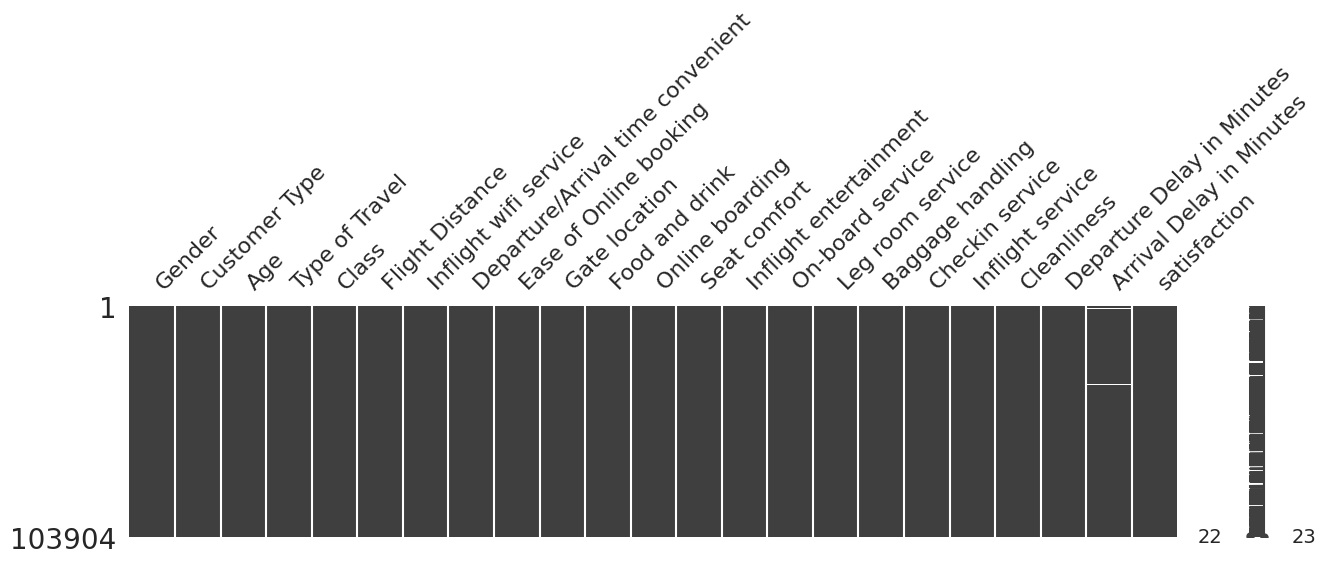

In [154]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(train_df, figsize=(15,3));

Observations:

There are 129880 rows for 23 features in our data.
We see in the training data, that all the datatypes belong to a numeric class i.e. int, float and object.
Only arrival dealy in minutes have some null values.

In [155]:
## Percentage of Null values
null_df = train_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(train_df)*100,2)
null_df[null_df["No of Null values"] > 0]


No of Null values  % of Null values
Arrival Delay in Minutes                310               0.3

In [156]:
round(train_df.describe().T,2)

count     mean     std   min    25%  \
Age                                103904.0    39.38   15.11   7.0   27.0   
Flight Distance                    103904.0  1189.45  997.15  31.0  414.0   
Inflight wifi service              103904.0     2.73    1.33   0.0    2.0   
Departure/Arrival time convenient  103904.0     3.06    1.53   0.0    2.0   
Ease of Online booking             103904.0     2.76    1.40   0.0    2.0   
Gate location                      103904.0     2.98    1.28   0.0    2.0   
Food and drink                     103904.0     3.20    1.33   0.0    2.0   
Online boarding                    103904.0     3.25    1.35   0.0    2.0   
Seat comfort                       103904.0     3.44    1.32   0.0    2.0   
Inflight entertainment             103904.0     3.36    1.33   0.0    2.0   
On-board service                   103904.0     3.38    1.29   0.0    2.0   
Leg room service                   103904.0     3.35    1.32   0.0    2.0   
Baggage handling                   103904.0     3.63    1.18   1.0    3.0   
Checkin service                    103904.0     3.30    1.27   0.0    3.0   
Inflight service                   103904.0     3.64    1.18   0.0    3.0   
Cleanliness                        103904.0     3.29    1.31   0.0    2.0   
Departure Delay in Minutes         103904.0    14.82   38.23   0.0    0.0   
Arrival Delay in Minutes           103594.0    15.18   38.70   0.0    0.0   

                                     50%     75%     max  
Age                                 40.0    51.0    85.0  
Flight Distance                    843.0  1743.0  4983.0  
Inflight wifi service                3.0     4.0     5.0  
Departure/Arrival time convenient    3.0     4.0     5.0  
Ease of Online booking               3.0     4.0     5.0  
Gate location                        3.0     4.0     5.0  
Food and drink                       3.0     4.0     5.0  
Online boarding                      3.0     4.0     5.0  
Seat comfort                         4.0     5.0     5.0  
Inflight entertainment               4.0     4.0     5.0  
On-board service                     4.0     4.0     5.0  
Leg room service                     4.0     4.0     5.0  
Baggage handling                     4.0     5.0     5.0  
Checkin service                      3.0     4.0     5.0  
Inflight service                     4.0     5.0     5.0  
Cleanliness                          3.0     4.0     5.0  
Departure Delay in Minutes           0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    13.0  1584.0

In [157]:
### Checking for the duplicate values in the dataset
train_df.duplicated().sum()

0

Dependent Variable

The Satisfaction is our Target Varible.


In [158]:
train_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [159]:
round(train_df["satisfaction"].value_counts()[1]/(train_df["satisfaction"].value_counts()[0]+train_df["satisfaction"].value_counts()[1])*100,2)

43.33

This problem is a binary classification problem of classes 0 or 1 denoting customers satisfaction, The class 1 has only 43.33% total values. Hence, this is an balanced learning problem. Hence will not be requiring any resampling techniques to tackle this.

In [160]:
#Independent Variables or Features
train_df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

#Exploratory Data Analysis and Visualization

In [161]:
train_df.corr()

Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
On-board service                   0.057594         0.109526   
Leg room service                   0.040583         0.133916   
Baggage handling                  -0.047529         0.063184   
Checkin service                    0.035482         0.073072   
Inflight service                  -0.049427         0.057540   
Cleanliness                        0.053611         0.093149   
Departure Delay in Minutes        -0.010152         0.002158   
Arrival Delay in Minutes          -0.012147        -0.002426   

                                   Inflight wifi service  \
Age                                             0.017859   
Flight Distance                                 0.007131   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.343845   
Ease of Online booking                          0.715856   
Gate location                                   0.336248   
Food and drink                                  0.134718   
Online boarding                                 0.456970   
Seat comfort                                    0.122658   
Inflight entertainment                          0.209321   
On-board service                                0.121500   
Leg room service                                0.160473   
Baggage handling                                0.120923   
Checkin service                                 0.043193   
Inflight service                                0.110441   
Cleanliness                                     0.132698   
Departure Delay in Minutes                     -0.017402   
Arrival Delay in Minutes                       -0.019095   

                                   Departure/Arrival time convenient  \
Age                                                         0.038125   
Flight Distance                                            -0.020043   
Inflight wifi service                                       0.343845   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.436961   
Gate location                                               0.444757   
Food and drink                                              0.004906   
Online boarding                                             0.070119   
Seat comfort                                                0.011344   
Inflight entertainment                                     -0.004861   
On-board service                                            0.068882   
Leg room service                                            0.012441   
Baggage handling                                            0.072126   
Checkin service                                             0.093333   
Inflight service                                            0.073318   
Cleanliness                                                 0.014292   
Departure Delay in Minutes                                  0.001005   
Arrival Delay in Minutes                                   -0.000864   

                                   Ease of Online booking  Gate location  \
Age                                              0.024842      -0.001330   
Flight Distance                                  0.065717       0.004793   
Inflight wifi service                            0.715856       0.336248   
Departure

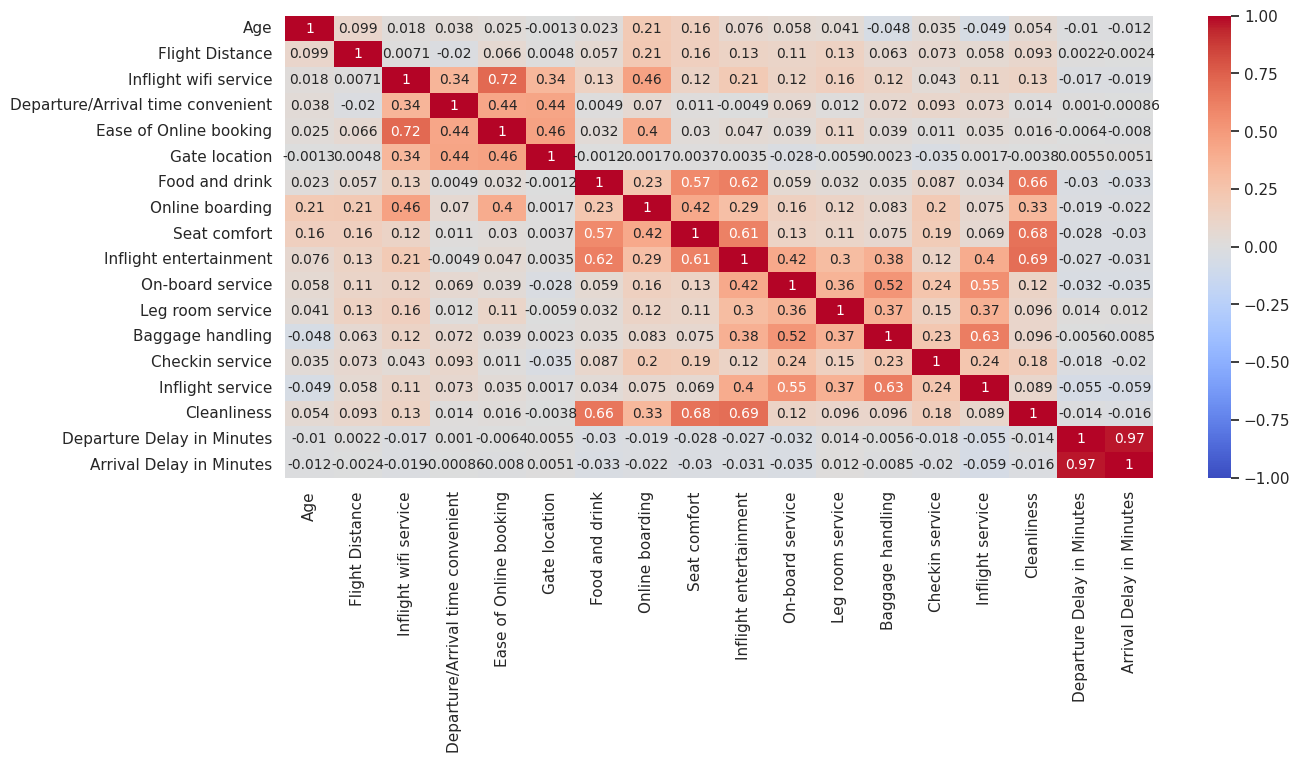

In [162]:
plt.figure(figsize=(14, 6))
sns.heatmap(train_df.corr(),annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

Observations:

Departure delay in minutes and arrival day in minutes are highly co related.

Data distribution graphs

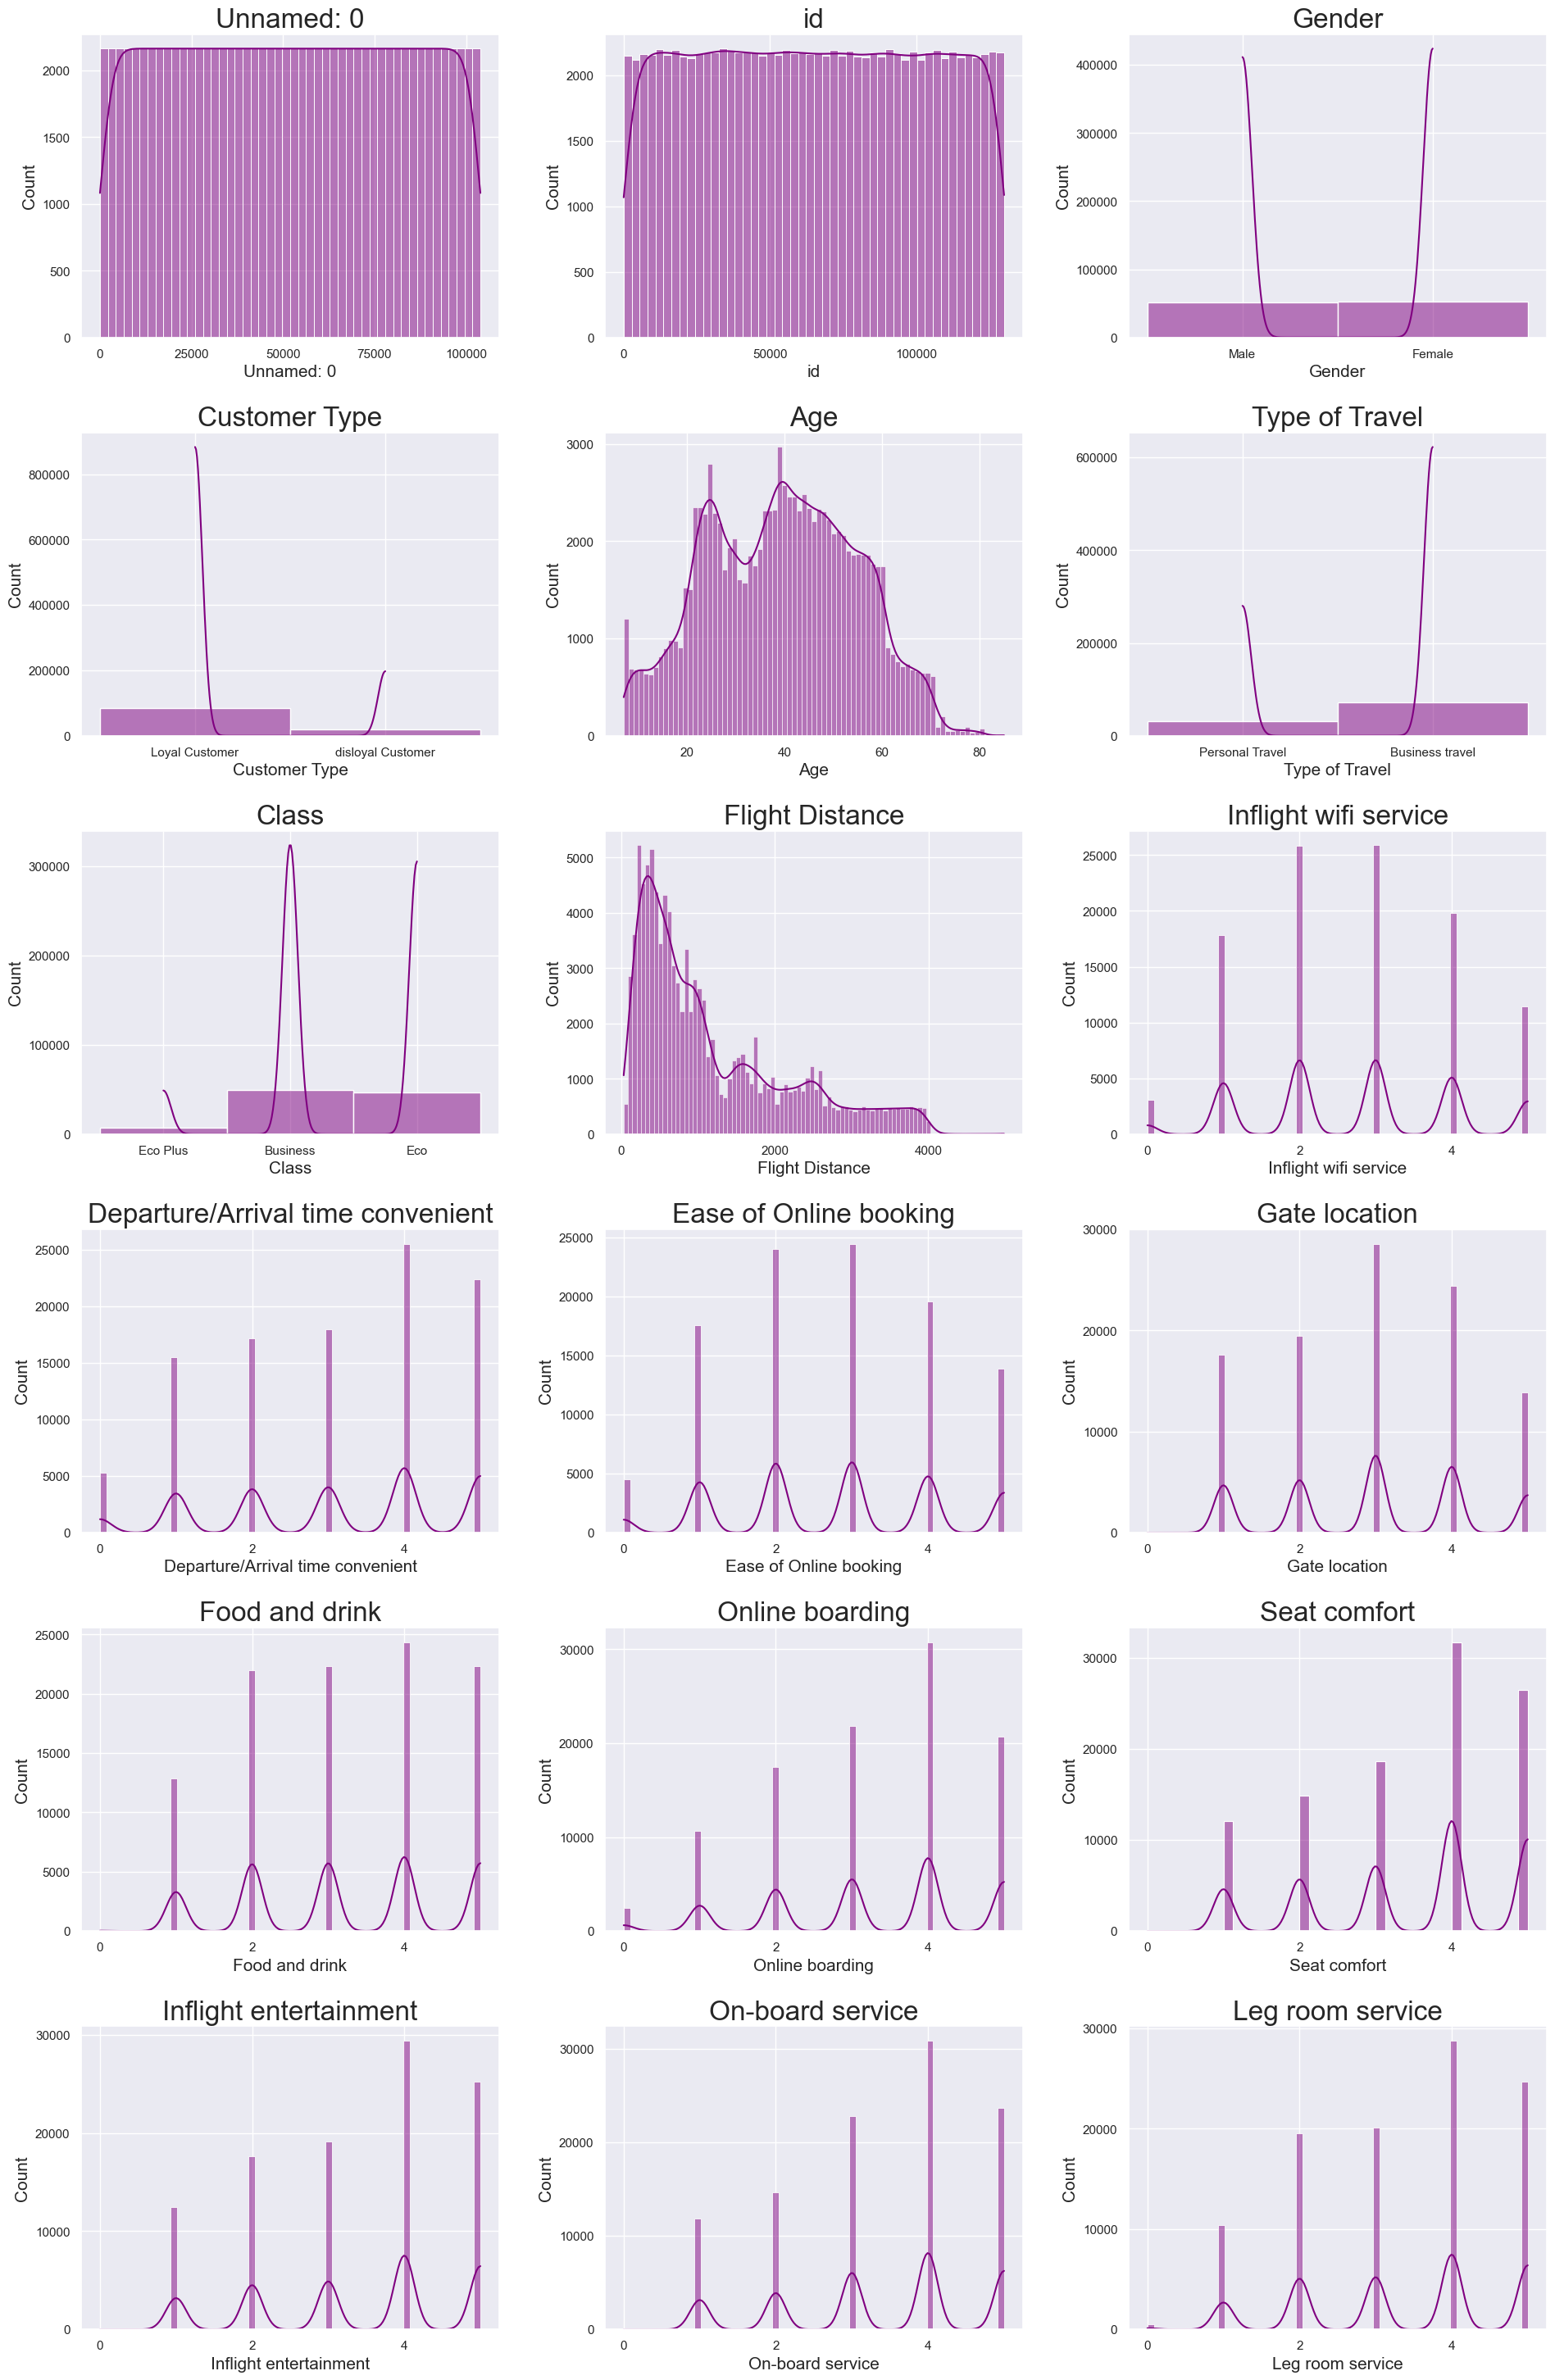

In [10]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=train_df,x=train_df[f],kde=True,color='purple')
    ax.set_title(f)

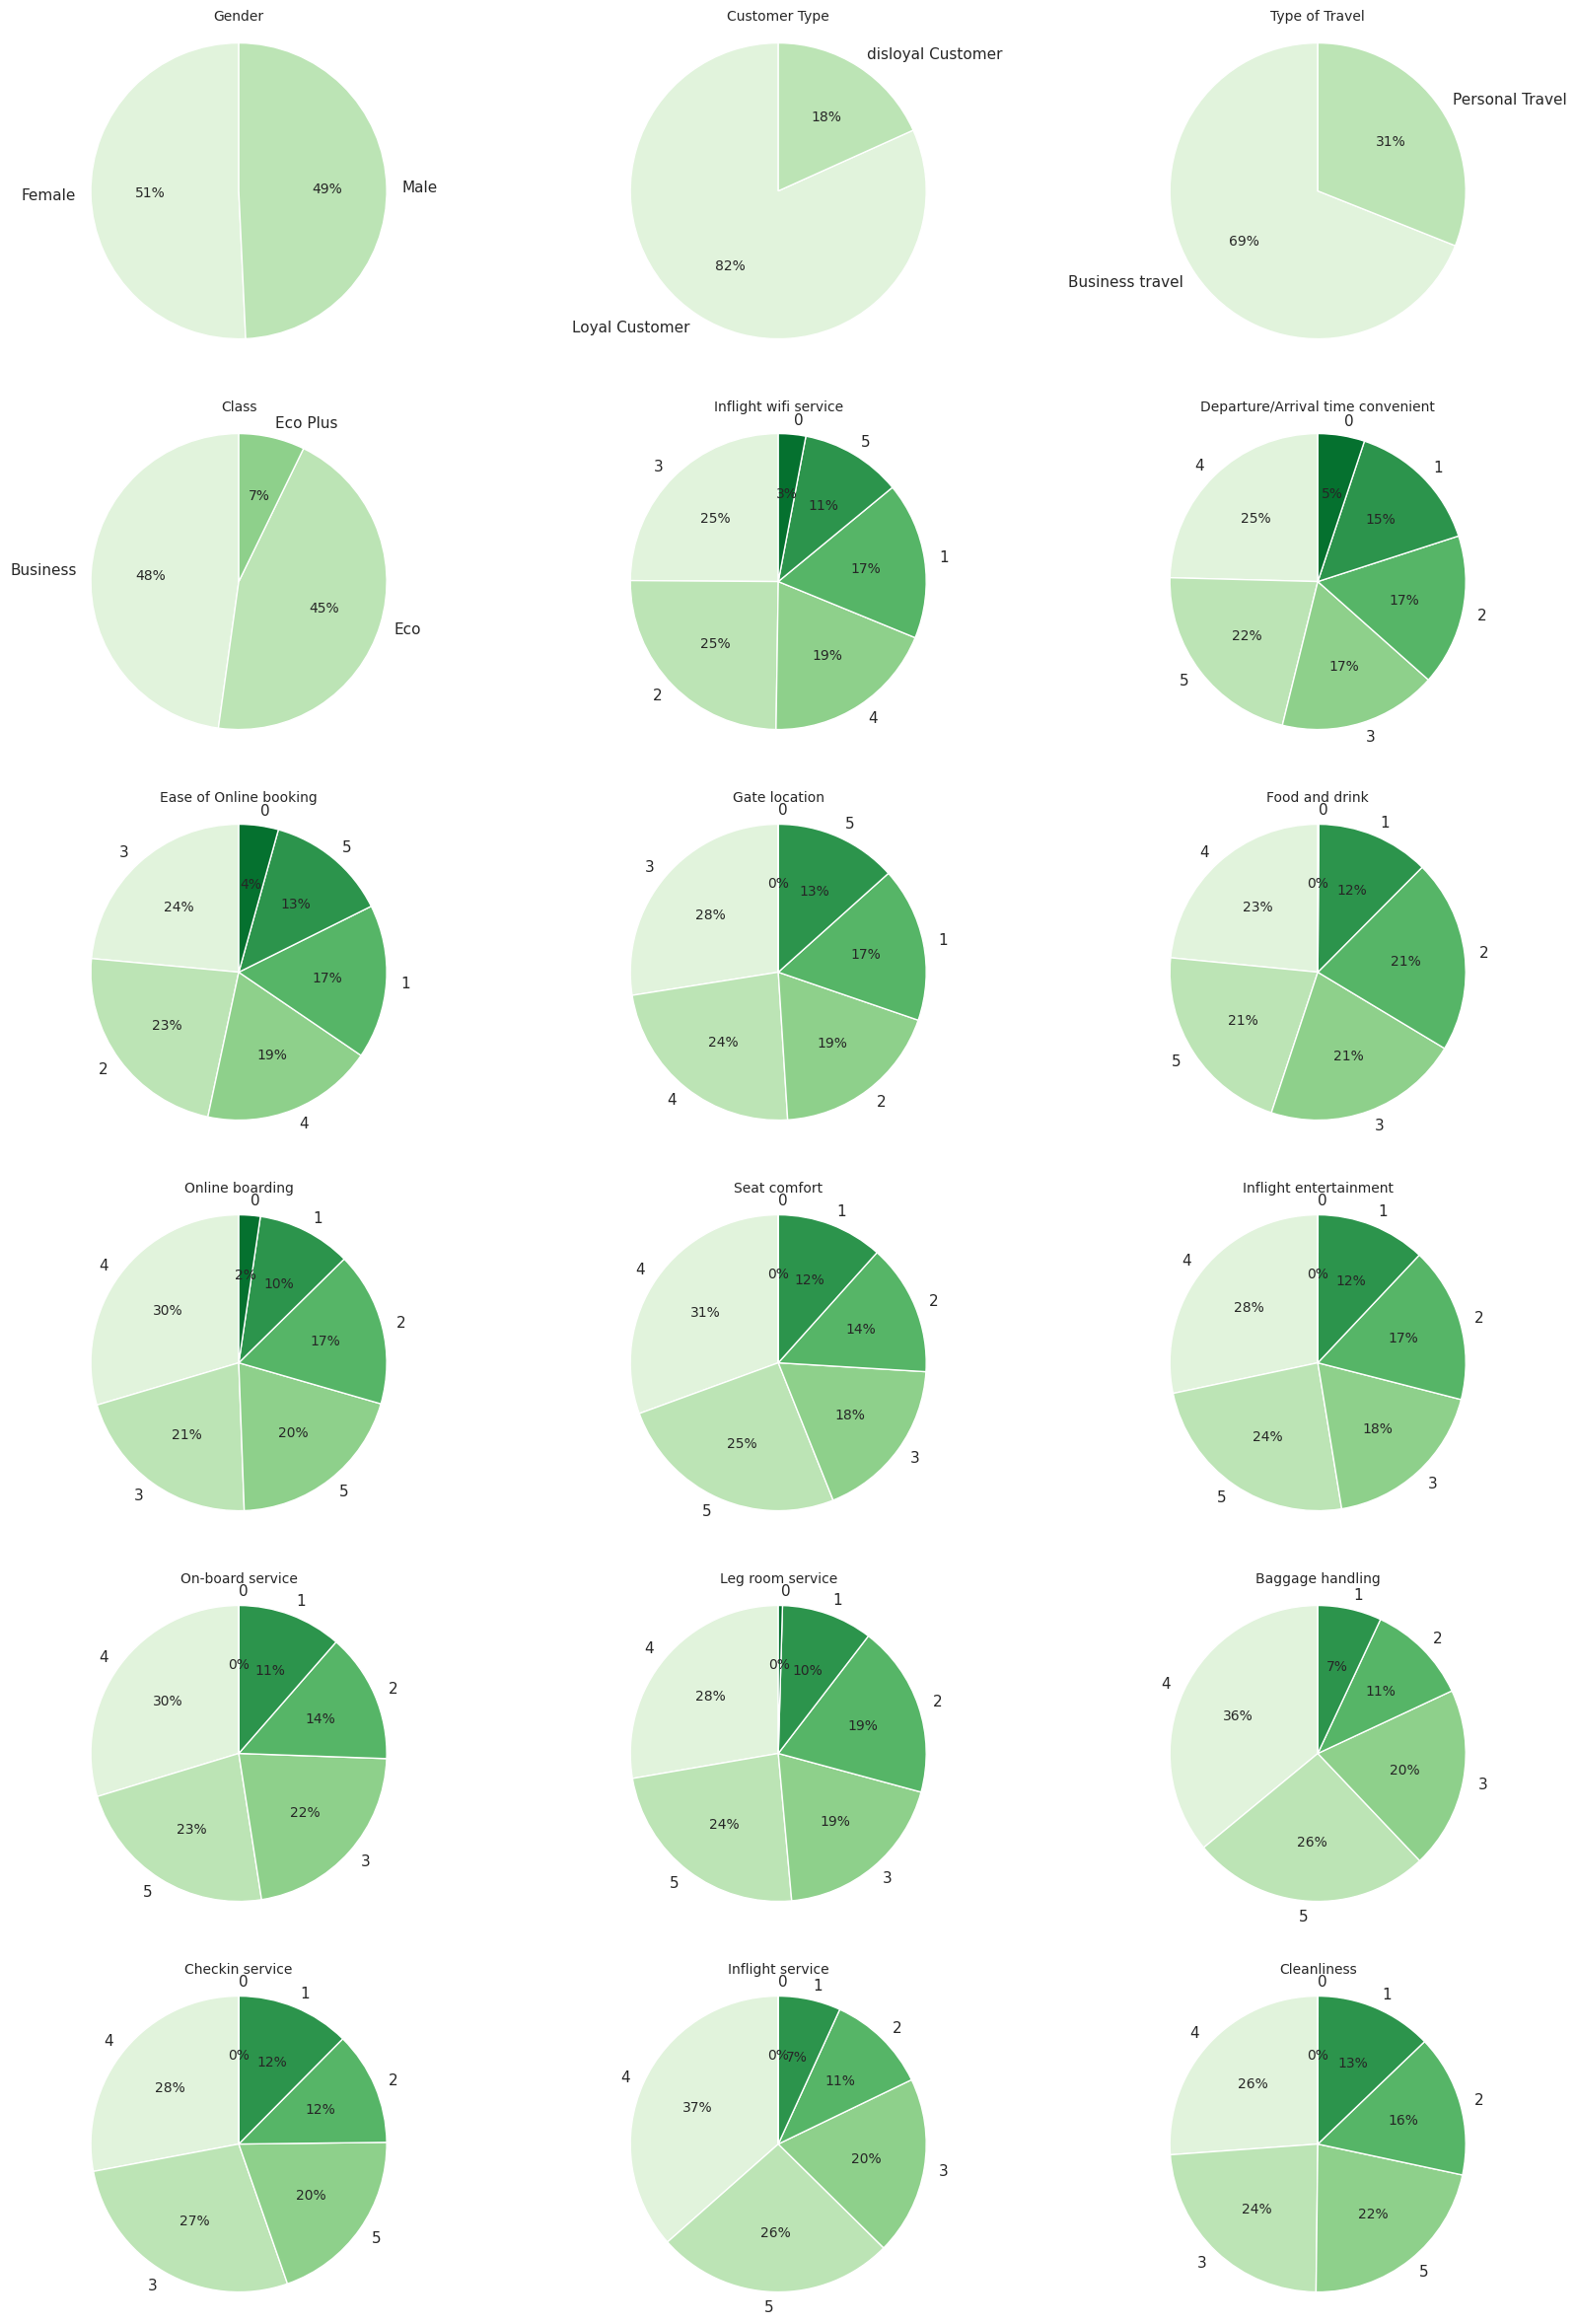

In [164]:
#Piechart percentage distribution features
new_train_df=train_df.copy()
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="whitegrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("Greens"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Observations:

The number of men and women in this sample is approximately the same

The vast majority of the airline's customers are repeat customers

Most of our clients flew for business rather than personal reasons

About half of the passengers were in business class

More than 60% of passengers were satisfied with the luggage transportation
service (rated 4-5 out of 5)

More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

In [165]:
# satisfaction
train_df["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

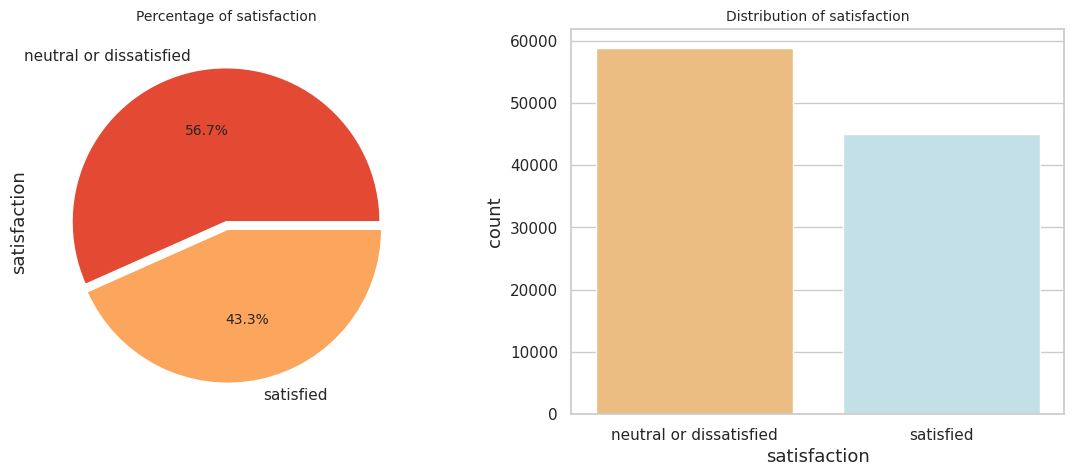

In [166]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
train_df['satisfaction'].value_counts().plot.pie(explode=[0,.05],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of satisfaction')
sns.countplot(x='satisfaction',data=train_df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of satisfaction')
plt.show();

Observations:

As per the given data 56.7% people are dissatisfied or neutral
And 43.3% people are satisfied.

To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [167]:
# numerical and categoriacl columns(features)
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total numeric columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Total categorical columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [168]:
categorical_cols.remove("satisfaction")

## Exploratory Data Analysis and Visualization on Numerical Columns

Boxplot: To check the Outliers in the numerical columns.

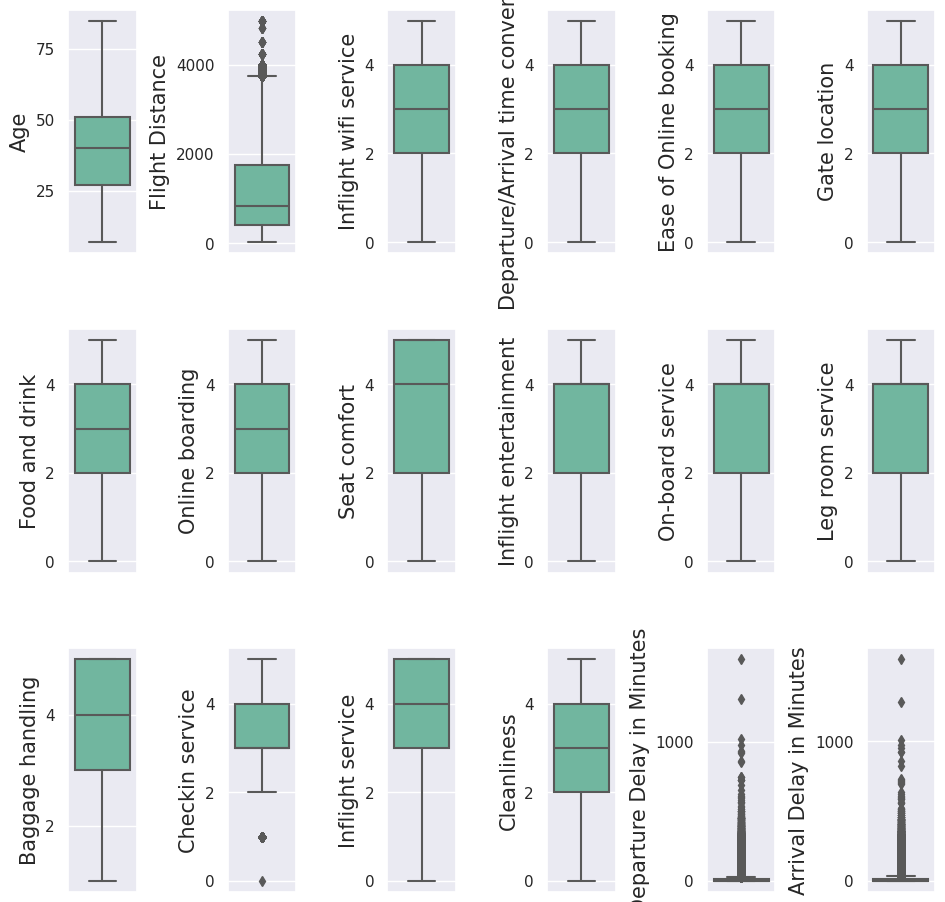

In [169]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(3, 6, figsize=(10,10))
fig.tight_layout(pad=3.0)

for f,ax in zip(numeric_cols,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=train_df,y=train_df[f],palette='BuGn')

Observations:

Flight distance, checkin service, Departure Delay in Minutes, Arrival Delay in Minutes has some outlies only

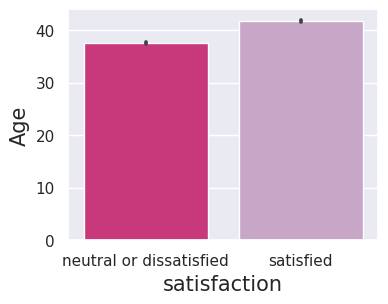

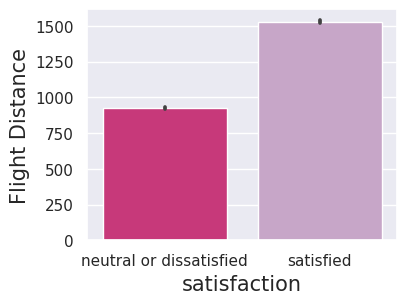

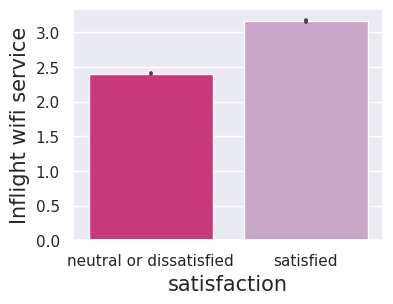

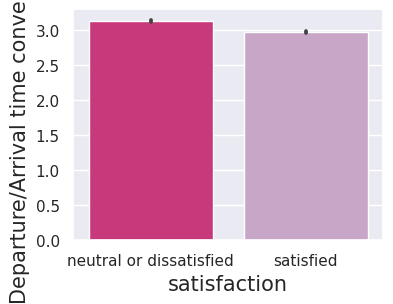

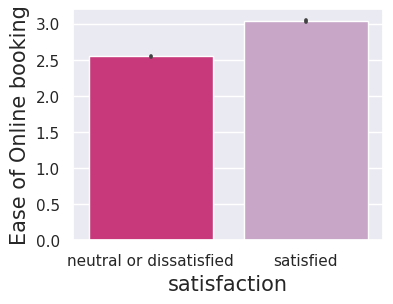

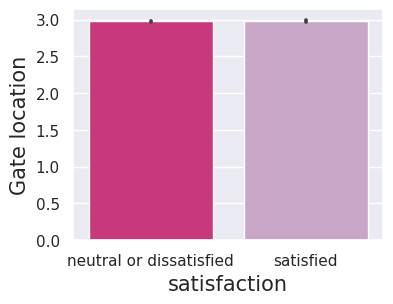

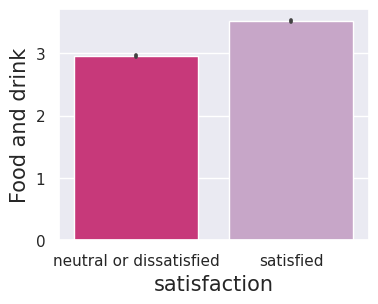

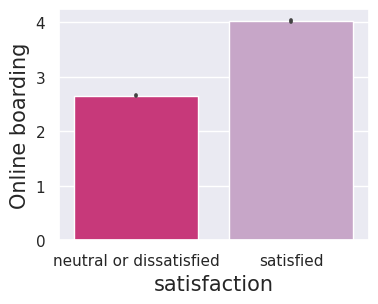

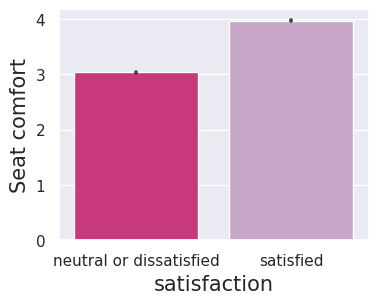

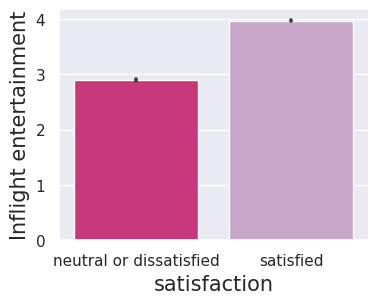

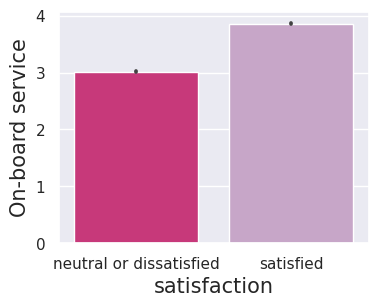

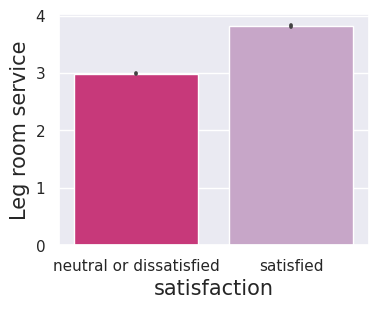

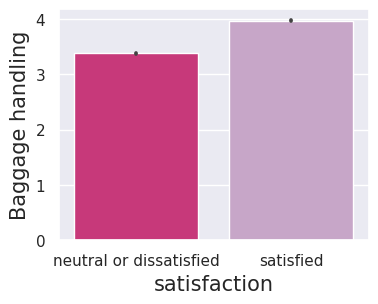

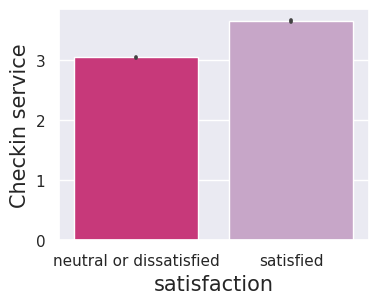

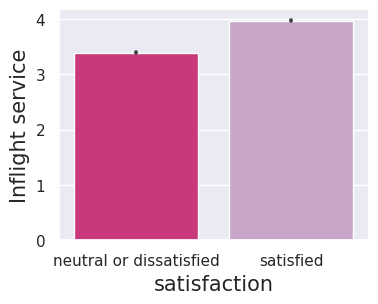

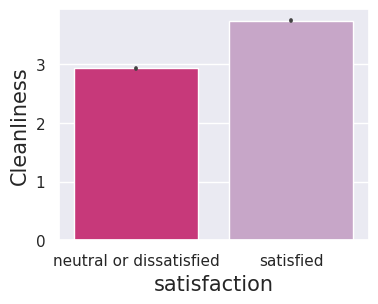

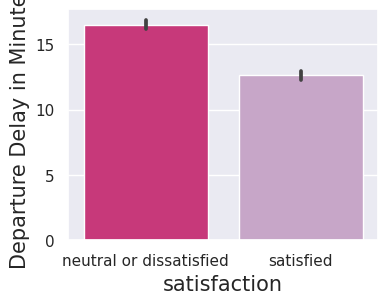

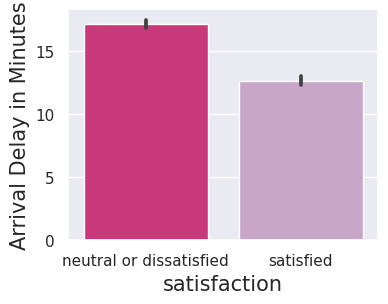

In [170]:
#Barplot representation of numerical feature
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(4,3),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")

for i in numeric_cols:
    sns.barplot(data=train_df,x='satisfaction',y=i,palette='PuRd_r')
    plt.show()


Observations:

From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction
and also the gender does not tell us much as seen in the earlier plot. Hence we can drop these values.

## Exploratory Data Analysis and Visualization on categorical column.
## Barplot represntation on categorica features

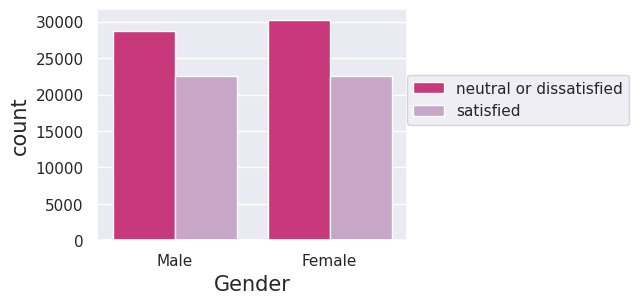

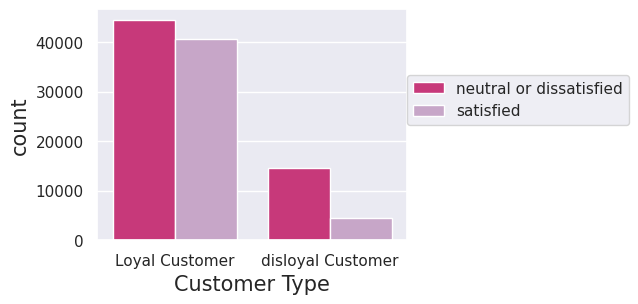

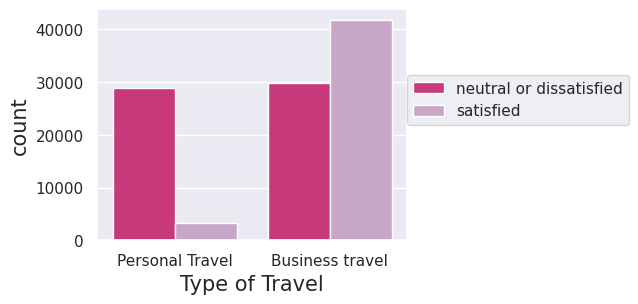

In [171]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical_cols[:-1]:
    plt.figure(figsize=(4,3))
    sns.countplot(data=train_df,x=col,hue ='satisfaction',palette='PuRd_r')
    plt.legend(loc=(1,0.5))

**Observations:**
- Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors

- Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers

- Business Travellers seems to be more satisfied with the flight, than the personal travellers


Arrival Delay in Minutes VS Departure Delay in minutes.

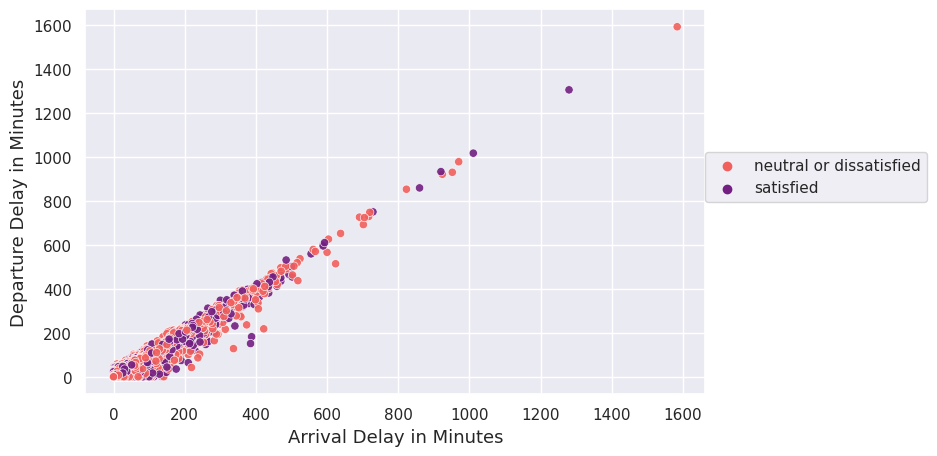

In [172]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(data=train_df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=.9)
plt.legend(loc=(1,0.5))

**Observations:**
- The arrival and departure delay seems to have a linear relationship, which makes complete sense and well, there is 1 customer who was satisfied even after a delay of 1300 minutes.

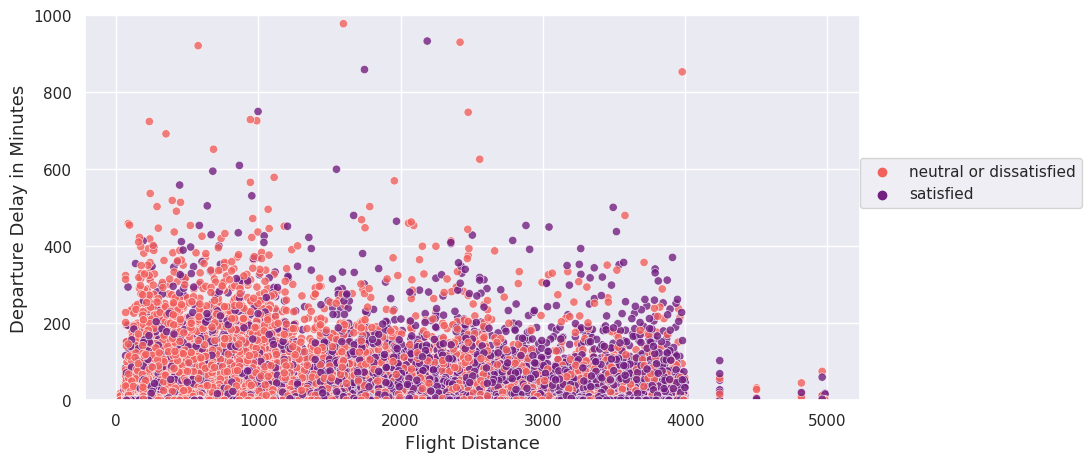

In [173]:
#Flight distance vs Departure Delay in minutes.
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train_df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='magma_r', alpha=0.8)
plt.ylim(0,1000)
plt.legend(loc=(1,0.5))

**Observations:**
- The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot!
- So departure delay is less of a factor for a long distance flight, comparitively. However short distance travellers does not seem to be excited about the departure delays, which also makes sense.

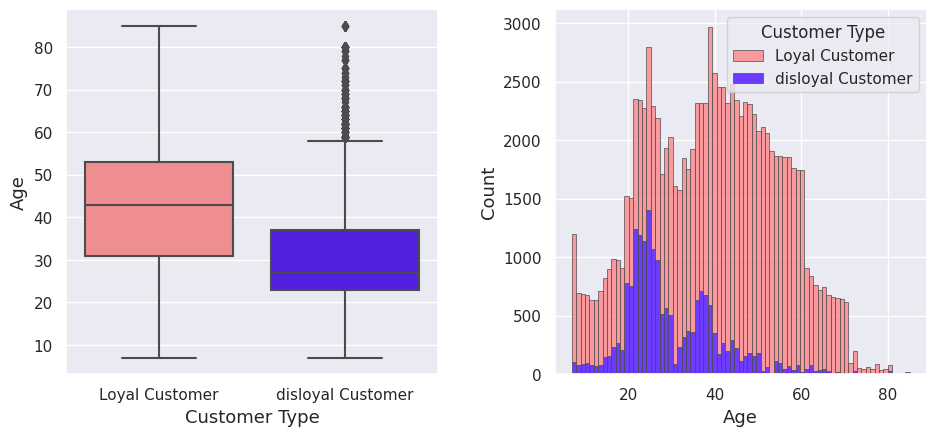

In [174]:
# Age and Customer Type
f, ax = plt.subplots(1, 2, figsize = (10,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.tight_layout(pad=3.0)

**Observations:**

- From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50 (their median age is slightly over 40).
- The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).


<Axes: xlabel='Age', ylabel='Count'>

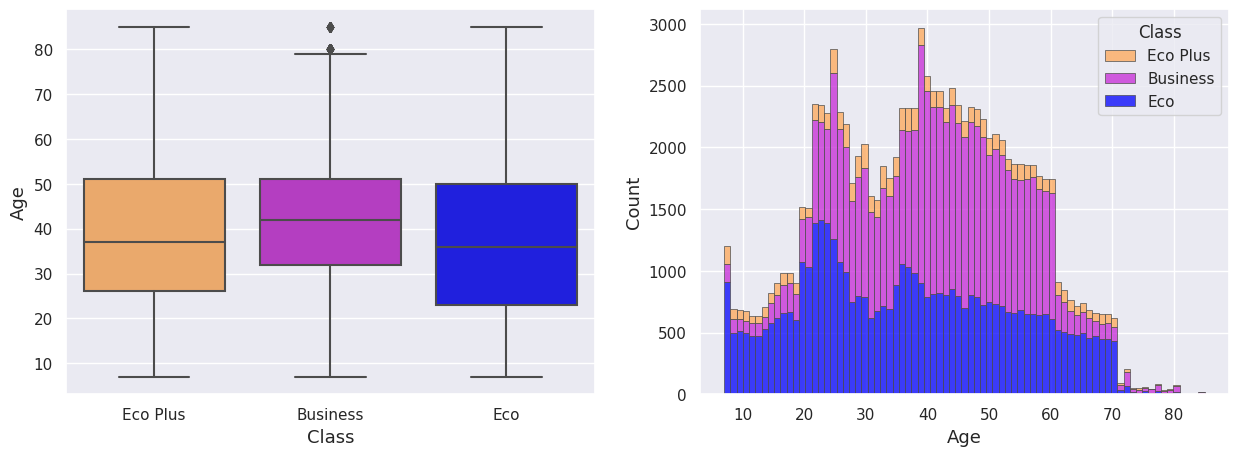

In [175]:
# Age vs Class
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

**Observations:**

- It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

<Axes: xlabel='Flight Distance', ylabel='Count'>

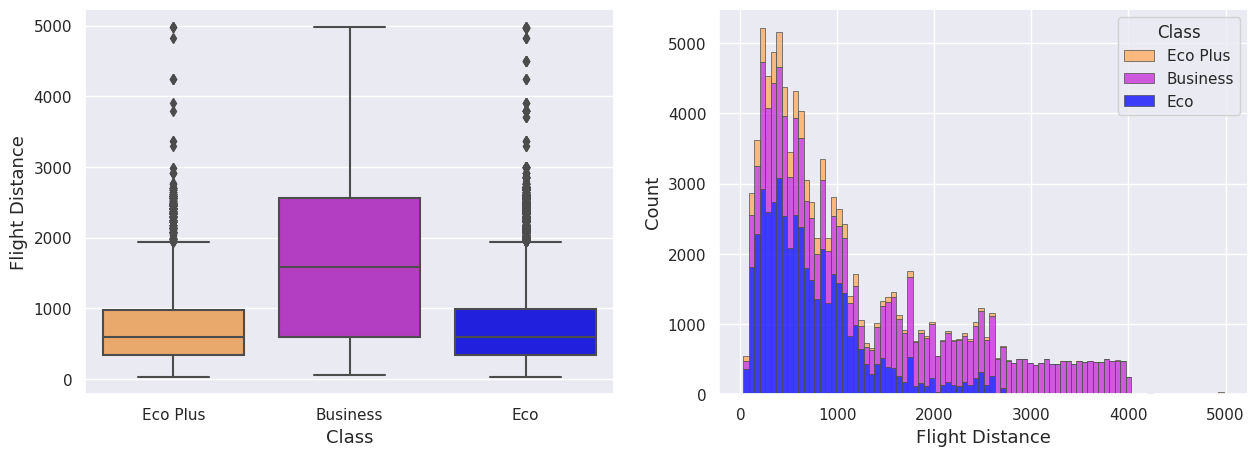

In [176]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0])
sns.histplot(train_df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1])

Observations:

customers whose flight distance is long, mostly fly in business class.

<Axes: xlabel='Flight Distance', ylabel='Count'>

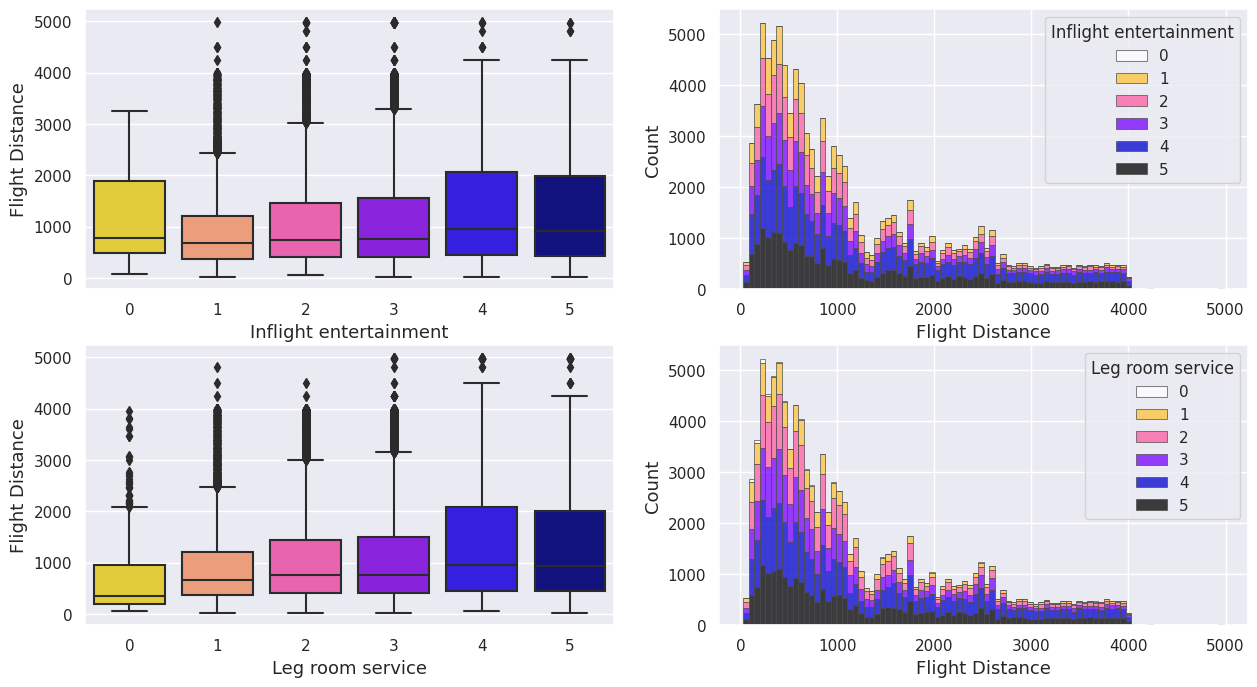

In [177]:
# Flight Distance
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[0, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = train_df, ax = ax[1, 0])
sns.histplot(train_df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])


**Observations:**

- The more distance an aircraft passenger travels (respectively, the longer they are in flight)
- The more they are satisfied with the entertainment in flight and the extra legroom (on average).

# Data Preprocessing and Feature Engineering

In [178]:
# checking for the null_values
train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [179]:
# step1: Independent features and dependent features
input_cols = list(train_df.iloc[:,:-1])# independent features
target_col="satisfaction" # dependent feature

In [180]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [181]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


 created copy of the datasets, so that there will not be further changes in the orignal dataset

In [182]:
# copy of training dataset
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

# copy of valdation dataset

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

# copy of test dataset

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

imputing the missing numerical values

The missing values are now filled with the imputer of each column.

In [183]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'median').fit(train_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [184]:
print(list(imputer.statistics_))

[40.0, 842.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 0.0, 0.0]


In [185]:
train_inputs[numeric_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [186]:
## scaling the numeric features.
scaler = MinMaxScaler().fit(train_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [187]:
train_inputs[numeric_cols].describe()

Age  Flight Distance  Inflight wifi service  \
count  62342.000000     62342.000000           62342.000000   
mean       0.414377         0.233852               0.545815   
std        0.194144         0.201567               0.265617   
min        0.000000         0.000000               0.000000   
25%        0.256410         0.077141               0.400000   
50%        0.423077         0.163772               0.600000   
75%        0.564103         0.344911               0.800000   
max        1.000000         1.000000               1.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       62342.000000            62342.000000   
mean                            0.611302                0.551355   
std                             0.306021                0.280040   
min                             0.000000                0.000000   
25%                             0.400000                0.400000   
50%                             0.600000                0.600000   
75%                             0.800000                0.800000   
max                             1.000000                1.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   62342.000000    62342.000000     62342.000000  62342.000000   
mean        0.494558        0.640380         0.649014      0.609360   
std         0.319194        0.265363         0.270075      0.329919   
min         0.000000        0.000000         0.000000      0.000000   
25%         0.250000        0.400000         0.400000      0.250000   
50%         0.500000        0.600000         0.600000      0.750000   
75%         0.750000        0.800000         0.800000      1.000000   
max         1.000000        1.000000         1.000000      1.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            62342.000000      62342.000000      62342.000000   
mean                 0.671233          0.676597          0.671053   
std                  0.265791          0.257001          0.262665   
min                  0.000000          0.000000          0.000000   
25%                  0.400000          0.400000          0.400000   
50%                  0.800000          0.800000          0.800000   
75%                  0.800000          0.800000          0.800000   
max                  1.000000          1.000000          1.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      62342.000000     62342.000000      62342.000000  62342.000000   
mean           0.658216         0.576838          0.728417      0.655988   
std            0.294975         0.316447          0.234581      0.262329   
min            0.000000         0.000000          0.000000      0.000000   
25%            0.500000         0.500000          0.600000      0.400000   
50%            0.750000         0.500000          0.800000      0.600000   
75%            1.000000         0.750000          1.000000      0.800000   
max            1.000000         1.000000          1.000000      1.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                62342.000000              62342.000000  
mean                     0.009334                  0.009566  
std                      0.024155                  0.024569  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                      0.007538                  0.008207  
max                      1.000000                  1.000000

One-hot encode categorical feature

In [188]:
! pip install --upgrade scikit-learn

In [196]:
from sklearn.preprocessing import OneHotEncoder

In [201]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [203]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


We can verify that these new columns have been added to our training, test and validation sets.

In [208]:
pd.set_option('display.max_columns', None)
test_inputs.head(2)

Gender   Customer Type       Age   Type of Travel     Class  \
80638  Female  Loyal Customer  0.243590  Personal Travel       Eco   
43398    Male  Loyal Customer  0.192308  Business travel  Business   

       Flight Distance  Inflight wifi service  \
80638         0.167609                    0.4   
43398         0.073102                    0.6   

       Departure/Arrival time convenient  Ease of Online booking  \
80638                                0.8                     0.4   
43398                                1.0                     1.0   

       Gate location  Food and drink  Online boarding  Seat comfort  \
80638            1.0             1.0              0.4           1.0   
43398            1.0             0.6              0.6           0.5   

       Inflight entertainment  On-board service  Leg room service  \
80638                     1.0               1.0               0.8   
43398                     0.6               0.2               0.2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
80638              0.75             0.50               1.0          1.0   
43398              0.50             0.25               0.6          0.6   

       Departure Delay in Minutes  Arrival Delay in Minutes  Gender_Female  \
80638                         0.0                  0.000000            1.0   
43398                         0.0                  0.010101            0.0   

       Gender_Male  Customer Type_Loyal Customer  \
80638          0.0                           1.0   
43398          1.0                           1.0   

       Customer Type_disloyal Customer  Type of Travel_Business travel  \
80638                              0.0                             0.0   
43398                              0.0                             1.0   

       Type of Travel_Personal Travel  Class_Business  Class_Eco  \
80638                             1.0             0.0        1.0   
43398                             0.0             1.0        0.0   

       Class_Eco Plus  
80638             0.0  
43398             0.0

## Saving Processed Data to Disk
It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [209]:
# check the shape of the data before saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (62342, 31)
train_targets: (62342,)
val_inputs: (20781, 31)
val_targets: (20781,)
test_inputs: (20781, 31)
test_targets: (20781,)


In [210]:
!pip install pyarrow --quiet

In [211]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')


# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [212]:
# check the shape of the data after saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (62342, 31)
train_targets: (62342,)
val_inputs: (20781, 31)
val_targets: (20781,)
test_inputs: (20781, 31)
test_targets: (20781,)


In [213]:
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [214]:
# Select the columns to be used for training/prediction

# training dataset
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df["satisfaction"]

# validation dataset
X_val = val_inputs[numeric_cols + encoded_cols]
y_val=  val_df["satisfaction"]

# test dataset
X_test = test_inputs[numeric_cols + encoded_cols]
y_test= test_df["satisfaction"]

In [215]:
y_train.value_counts()

0    35308
1    27034
Name: satisfaction, dtype: int64

In [216]:
y_val.value_counts()

0    11858
1     8923
Name: satisfaction, dtype: int64

In [217]:
y_test.value_counts()

0    11713
1     9068
Name: satisfaction, dtype: int64

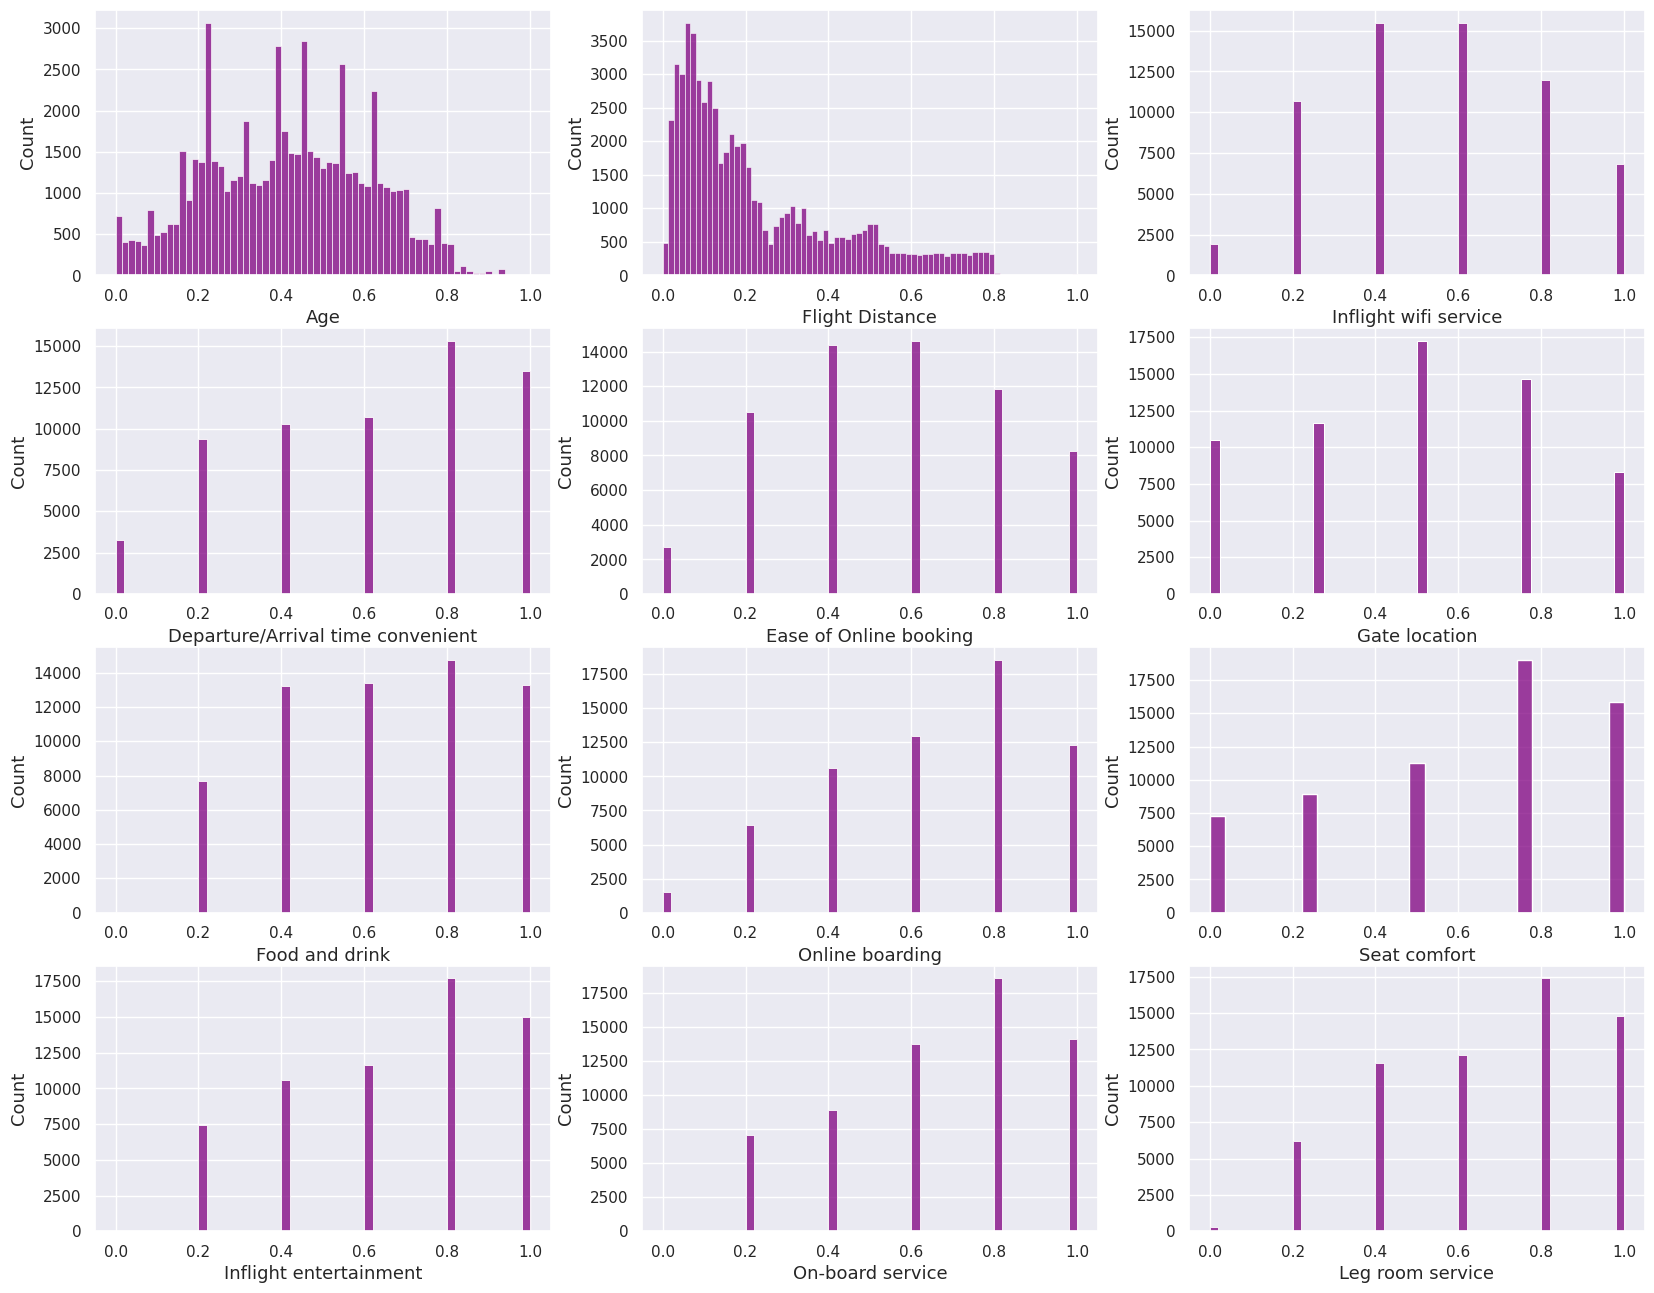

In [218]:
### Distribution after transformation

columnList = list(X_train.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

 # Data Modelling

 Helper function

In [219]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [220]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [221]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None:
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))


    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])


# Non Tree Models

Logistic Regression

		LOGISTICREGRESSION MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.84      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.57      0.58      0.58     11858
              satisfaction       0.43      0.42      0.43      8923

                  accuracy                           0.51     20781
                 macro avg       0.50      0.50      0.50     20781
              weighted avg       0.51      0.51      0.51     20781

Accuracy score for traing dataset 0.8743383272913926
Accuracy score for validation dataset 0.5129204561859391
ROC AUC 

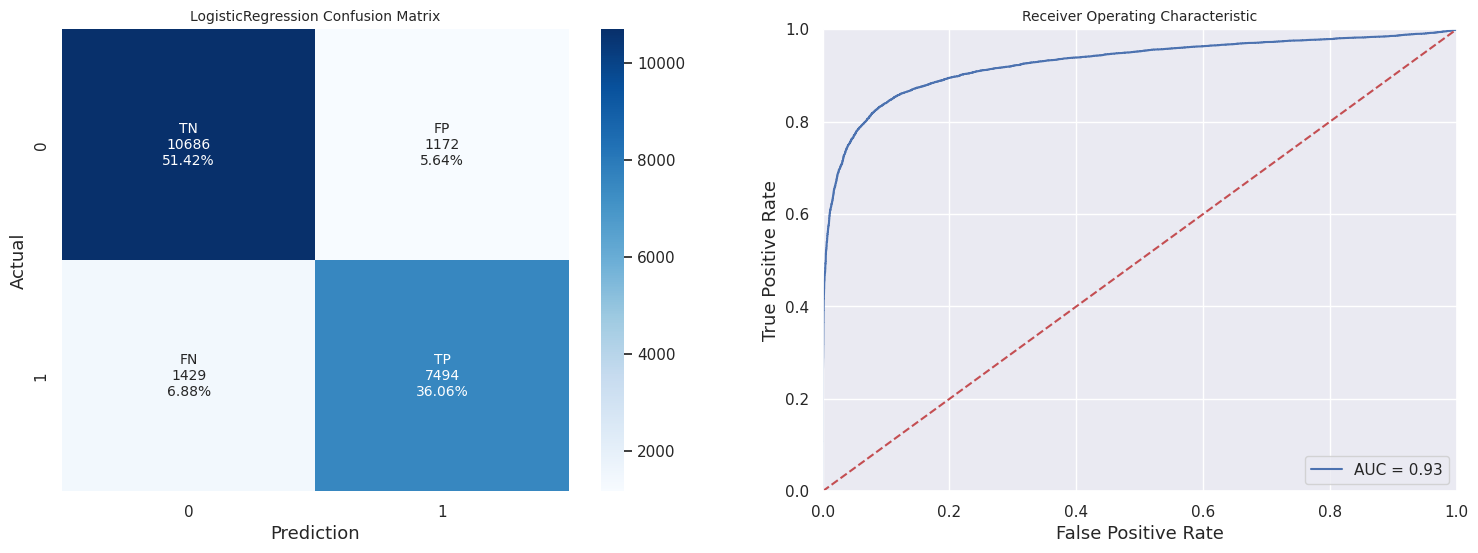

In [222]:
# import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model =LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations**
- The auc roc score is 92.68 %
- But this model is not working good with validation data. And also not predecting the True Positives.

# Gaussian Naive Bayes

		GAUSSIANNB MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     35308
              satisfaction       0.83      0.82      0.82     27034

                  accuracy                           0.85     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.85      0.85     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.87      0.87     11858
              satisfaction       0.82      0.82      0.82      8923

                  accuracy                           0.85     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.85      0.85     20781

Accuracy score for traing dataset 0.8472458374771422
Accuracy score for validation dataset 0.8476492950291131
ROC AUC Score : 

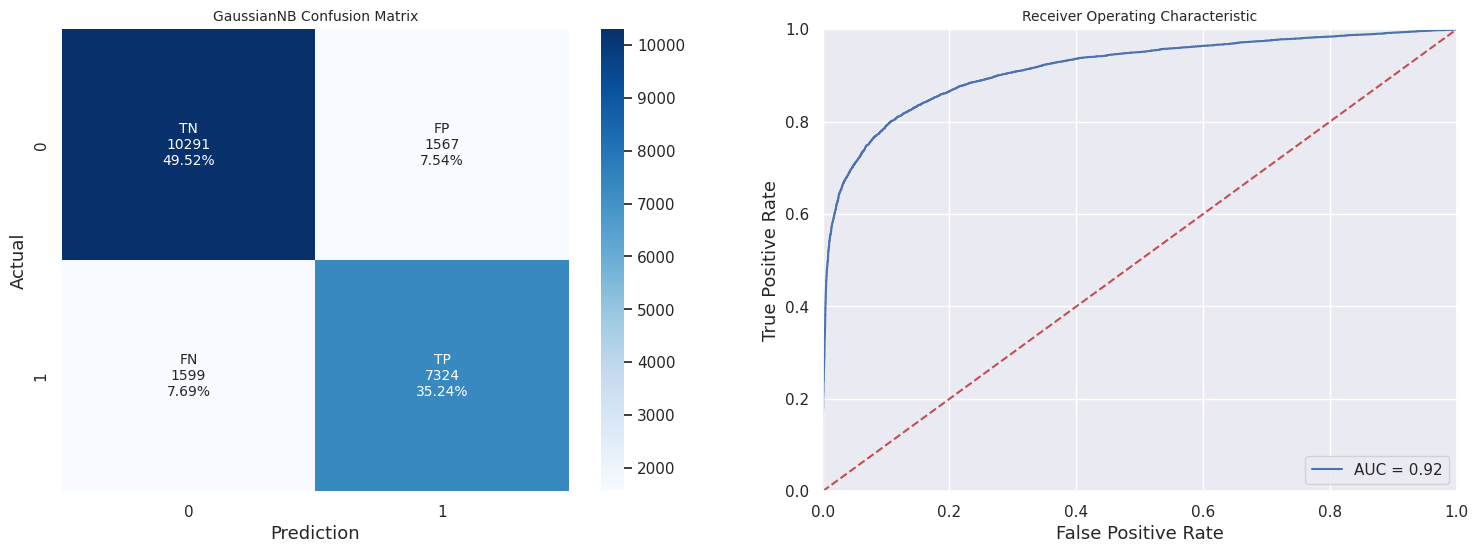

In [223]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations**

- The ROC AUC score is 91.58%. But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives
- The Recall and F1 Score of the GaussianNB is more less than Logistic Regresssion.
- This model working better with validation data.

### SVM(Support Vector Machines)

		LINEARSVC MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

Accuracy score for traing dataset 0.8731032049019922
Accuracy score for validation dataset 0.8741157788364371
ROC AUC Score : 9

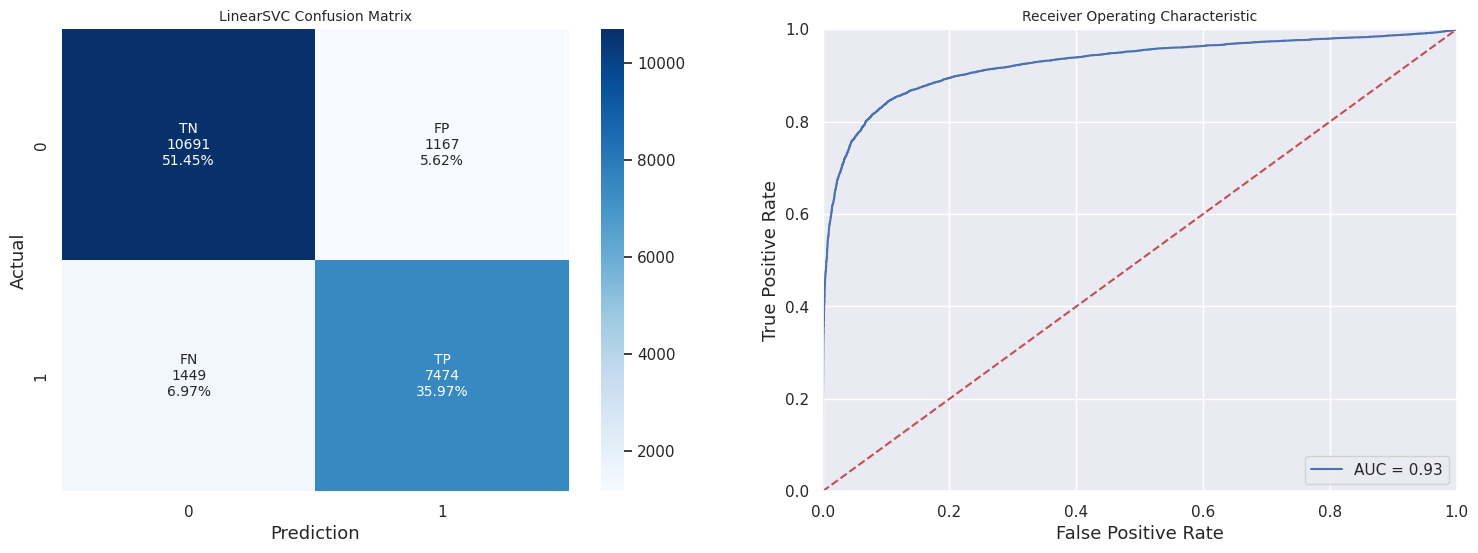

In [224]:
# import the model
from sklearn.svm import LinearSVC

#fit the model
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations**

- The ROC AUC score is 92.62%.
- But the Recall and F1 scores are low. Thus we can say our model is failing to predict the True Positives

###K-Nearest Neighbours

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7889cba95d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


		KNEIGHBORSCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.94      0.94     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.87      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.92     20781

Accuracy score for traing dataset 0.9447884251387507
Accuracy score for validation dataset 0.9251720321447476
ROC AU

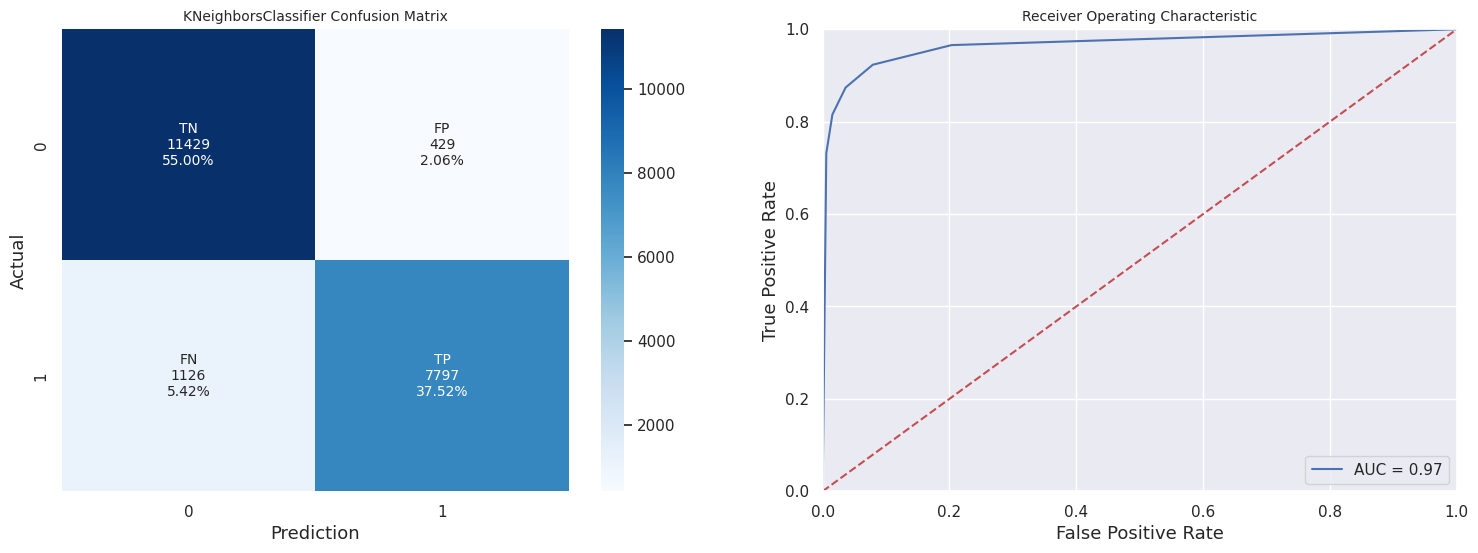

In [225]:
# import the model
from sklearn.neighbors import KNeighborsClassifier

#fit the model
model =KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

The ROC AUC score is 96.60%.
The Recall and F1 scores are good.
But model is failing to predict the True Positives.

SGDClassifier

		SGDCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.77      0.83     35308
              satisfaction       0.75      0.90      0.82     27034

                  accuracy                           0.83     62342
                 macro avg       0.83      0.84      0.83     62342
              weighted avg       0.84      0.83      0.83     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.77      0.83     11858
              satisfaction       0.74      0.91      0.82      8923

                  accuracy                           0.83     20781
                 macro avg       0.83      0.84      0.83     20781
              weighted avg       0.84      0.83      0.83     20781

Accuracy score for traing dataset 0.8271149465849668
Accuracy score for validation dataset 0.8263798662239545
ROC AUC Score

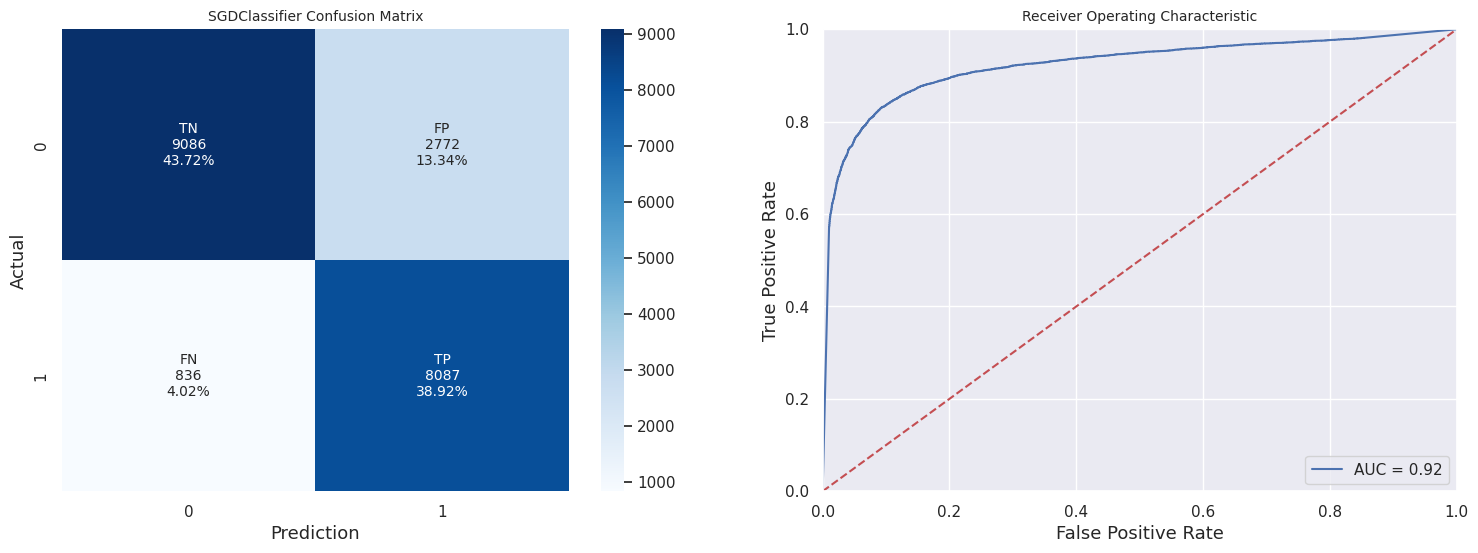

In [226]:
# import the model
from sklearn.linear_model import SGDClassifier

#fit the model
model =SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 92.26%. But the Recall and F1 scores are low.

# Tree Based models

Decision Tree Classifier

		DECISIONTREECLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.94      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9476926038207979
ROC AUC Score : 94.

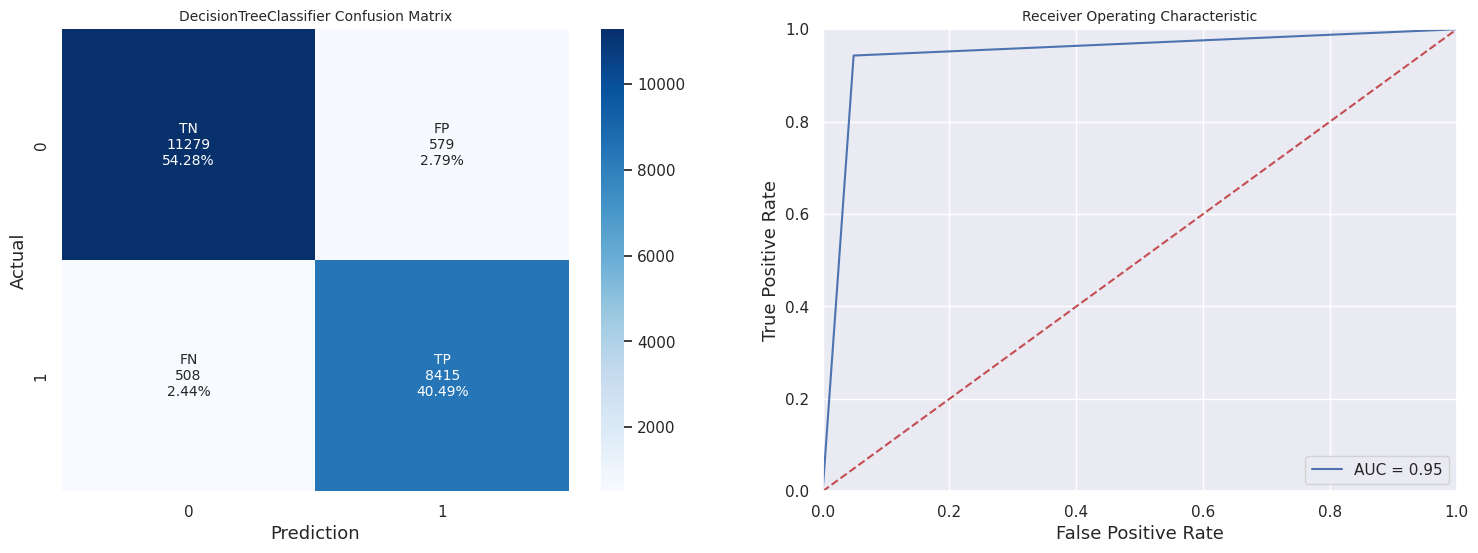

In [227]:
# import the model
from sklearn.tree import DecisionTreeClassifier

#fit the model
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 94.71%.
- The Recall and F1 scores are good.
- But model will cause overfitting. as the accuracy score for training dataset is 1.

# Random Forest Classifier

		RANDOMFORESTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9620807468360522
ROC AUC Score : 99.

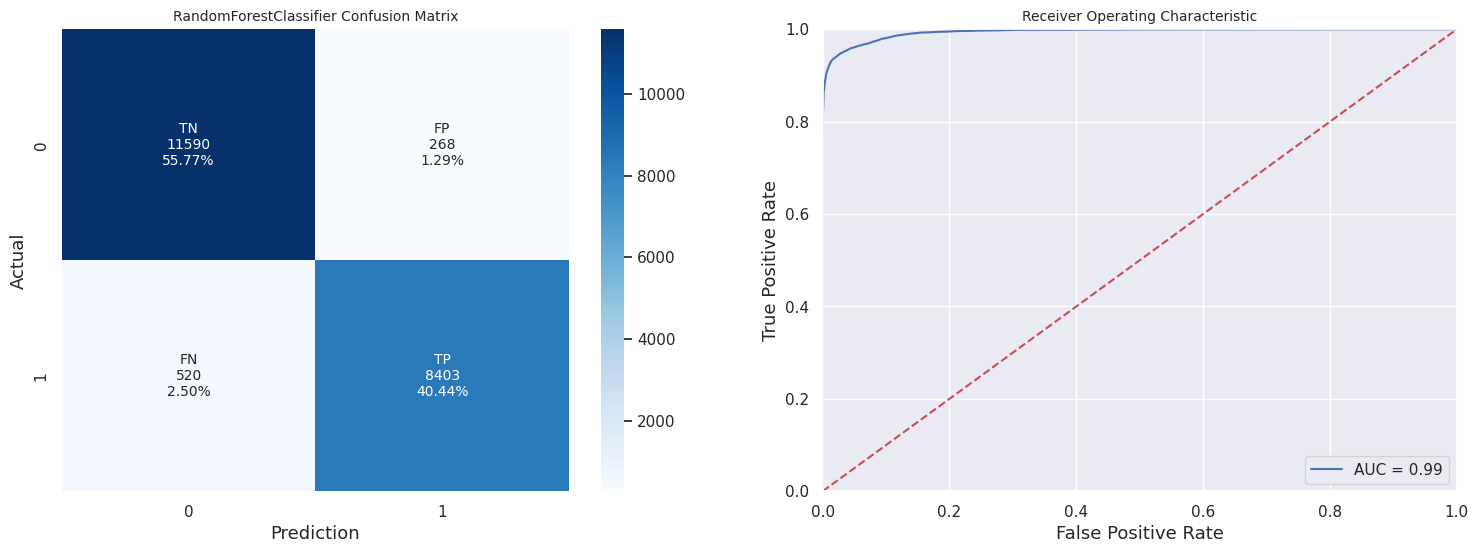

In [228]:
#import the model

from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

The ROC AUC score is 99.37%.The Recall and F1 scores are good.
But model can cause overfitting, as the accuracy score for training dataset is 1

Adaboost Classifier

		ADABOOSTCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.91      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

Accuracy score for traing dataset 0.9286997529755221
Accuracy score for validation dataset 0.9283961310812762
ROC AUC 

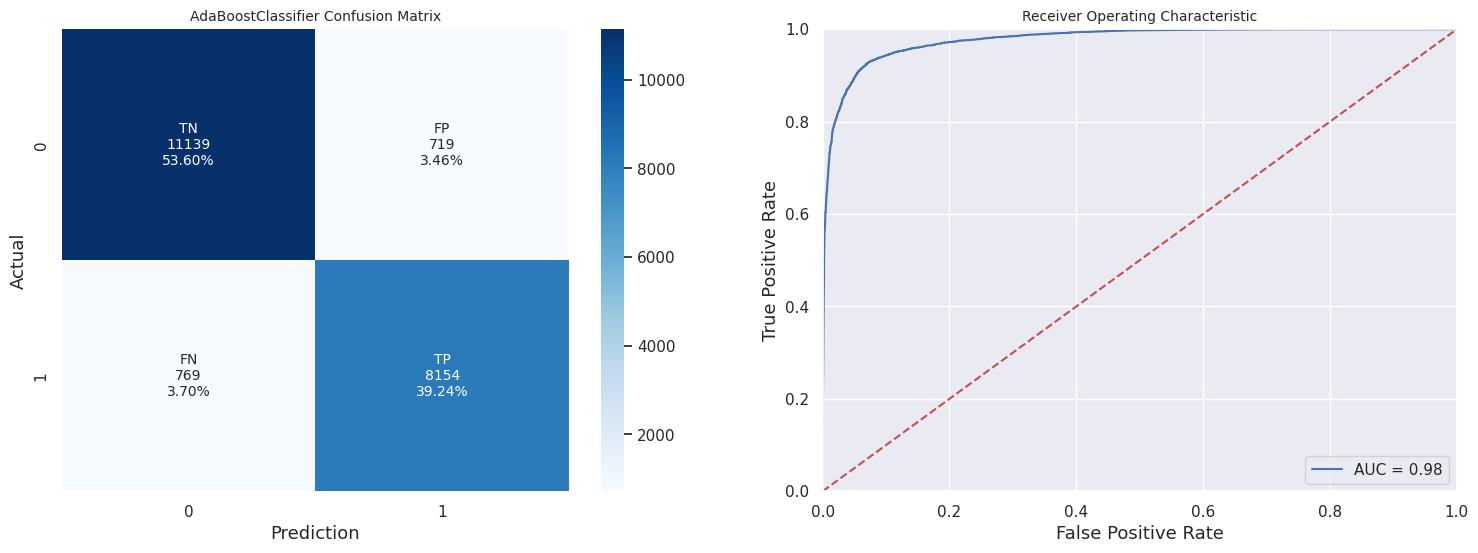

In [229]:
#import the model

from sklearn.ensemble import AdaBoostClassifier
#fit the model
model =AdaBoostClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)


**Observations:**
- The ROC AUC score is 97.74%.
- The Recall and F1 scores are good but comapritively lower than the random forest.

Gradient Boosting Classifier

		GRADIENTBOOSTINGCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

Accuracy score for traing dataset 0.942735234673254
Accuracy score for validation dataset 0.9418218565035369
R

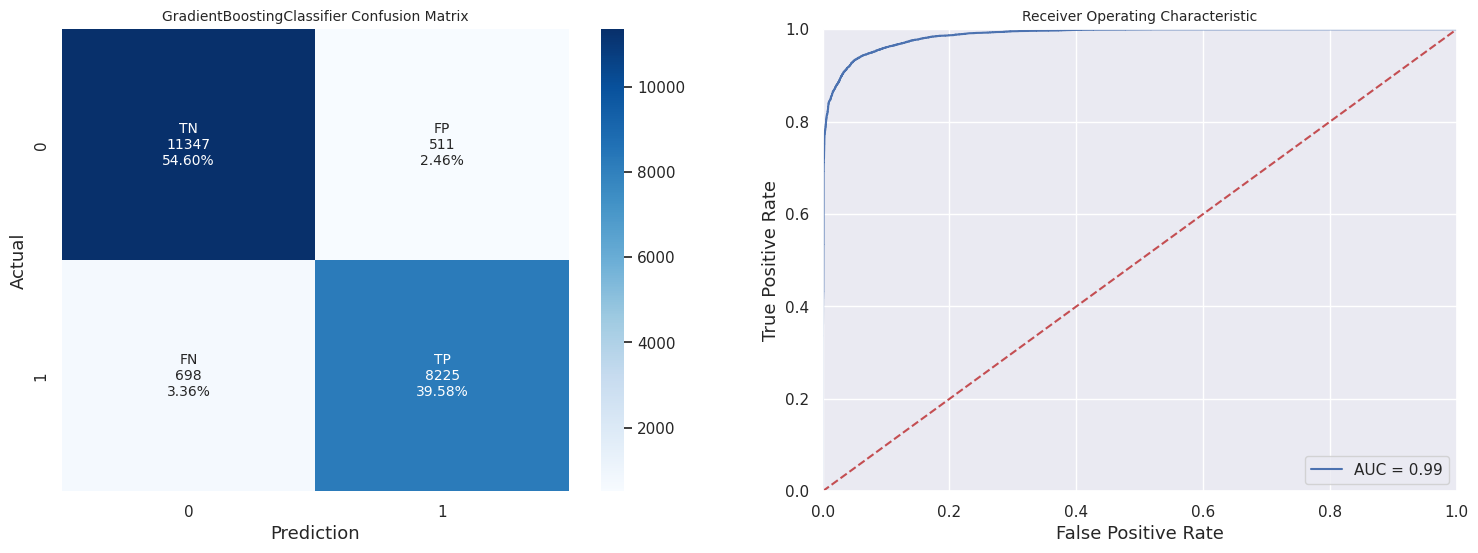

In [230]:
#import the model

from sklearn.ensemble import GradientBoostingClassifier

#fit the model
model =GradientBoostingClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- The ROC AUC score is 98.74%.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model.

Extreme Gradient Boosting Machines(XGBoost)

		XGBCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     35308
              satisfaction       0.99      0.96      0.98     27034

                  accuracy                           0.98     62342
                 macro avg       0.98      0.98      0.98     62342
              weighted avg       0.98      0.98      0.98     62342

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9789387571781464
Accuracy score for validation dataset 0.9623213512343005
ROC AUC Score

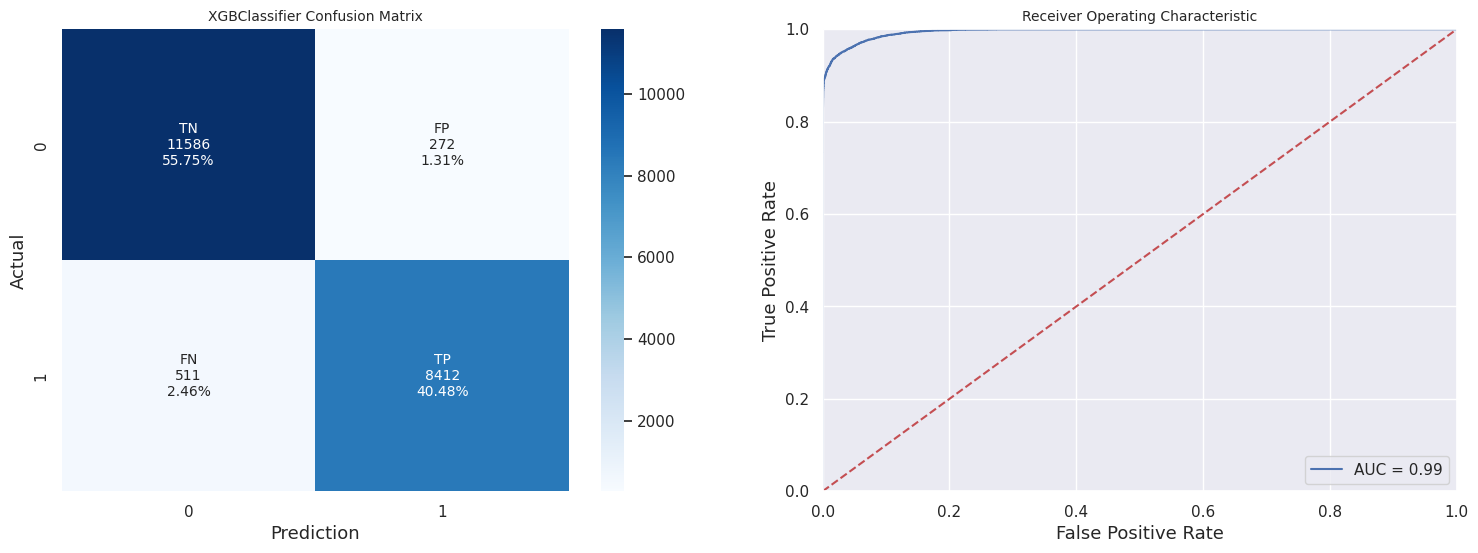

In [231]:
#import the model

from xgboost import XGBClassifier

#fit the model
model =XGBClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

Observations:

- The ROC AUC score is 98.72%.slightly higher than gradient Boosting.
- The Recall and F1 scores are good.
- We can choose this datadset to train our model and can also improve our model with Hyperparameter tunning.

### LightBoost

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27034, number of negative: 35308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 62342, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433640 -> initscore=-0.267014
[LightGBM] [Info] Start training from score -0.267014
		LGBMCLASSIFIER MODEL

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.95      0.96     27034

                  accuracy                           0.97     62342
                 macro avg       0.97      0.96   

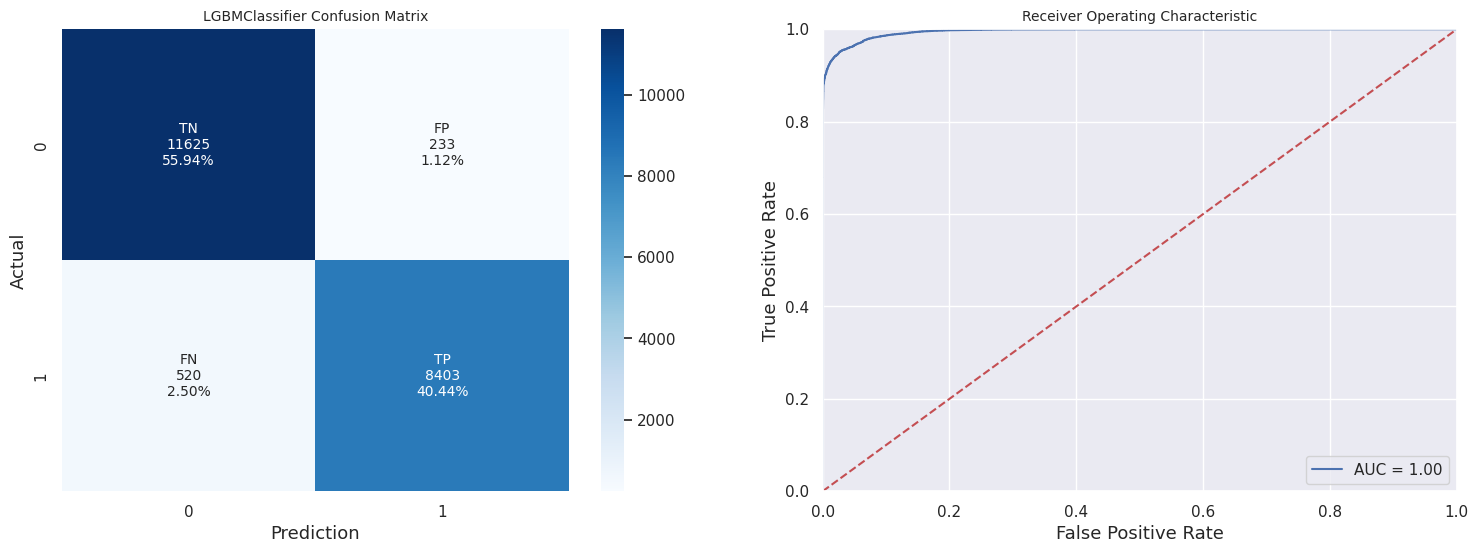

In [232]:
#import the model

import lightgbm as lgb

#fit the model
model =lgb.LGBMClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

make_classification_report(model,X_val,y_val)

**Observations:**
- this model is performing best with our Dataset.
- The ROC AUC score is 99.49%.
- The Recall and F1 scores are Very good.
- We can choose this datadset to train our model.

## putting all the models prediction in sigle function.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27034, number of negative: 35308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 62342, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433640 -> initscore=-0.267014
[LightGBM] [Info] Start training from score -0.267014
Log_reg : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.84      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     

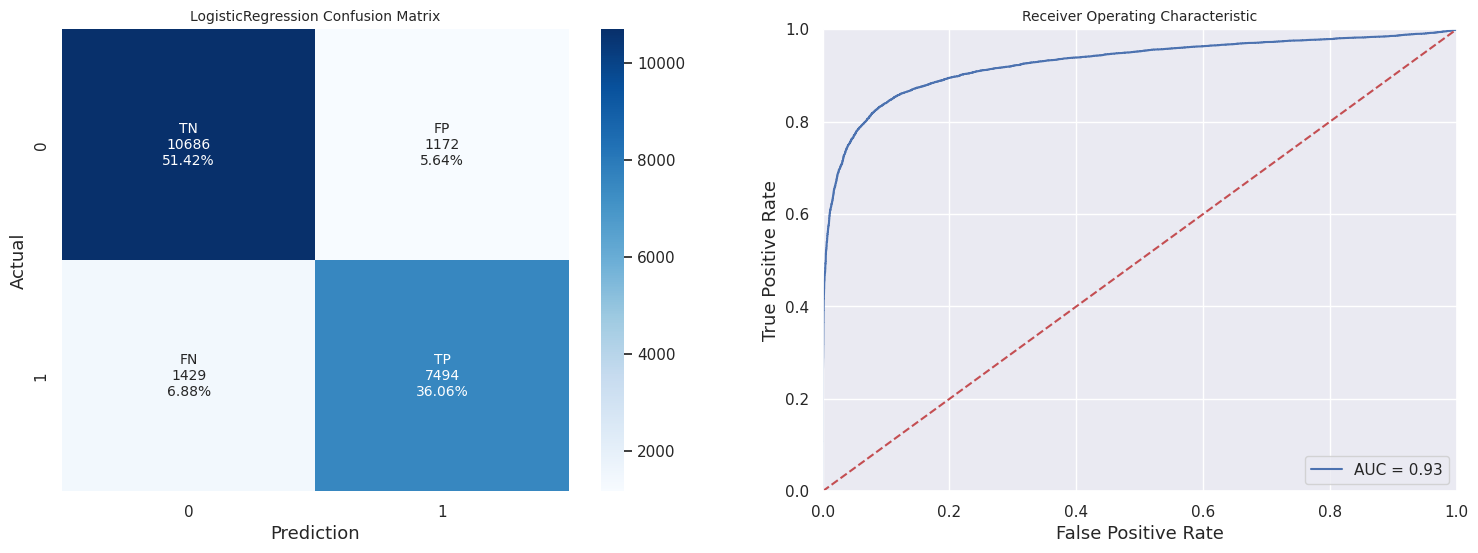

Gaus_NB : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     35308
              satisfaction       0.83      0.82      0.82     27034

                  accuracy                           0.85     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.85      0.85     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.87      0.87     11858
              satisfaction       0.82      0.82      0.82      8923

                  accuracy                           0.85     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.85      0.85     20781

ROC AUC Score : 91.53%



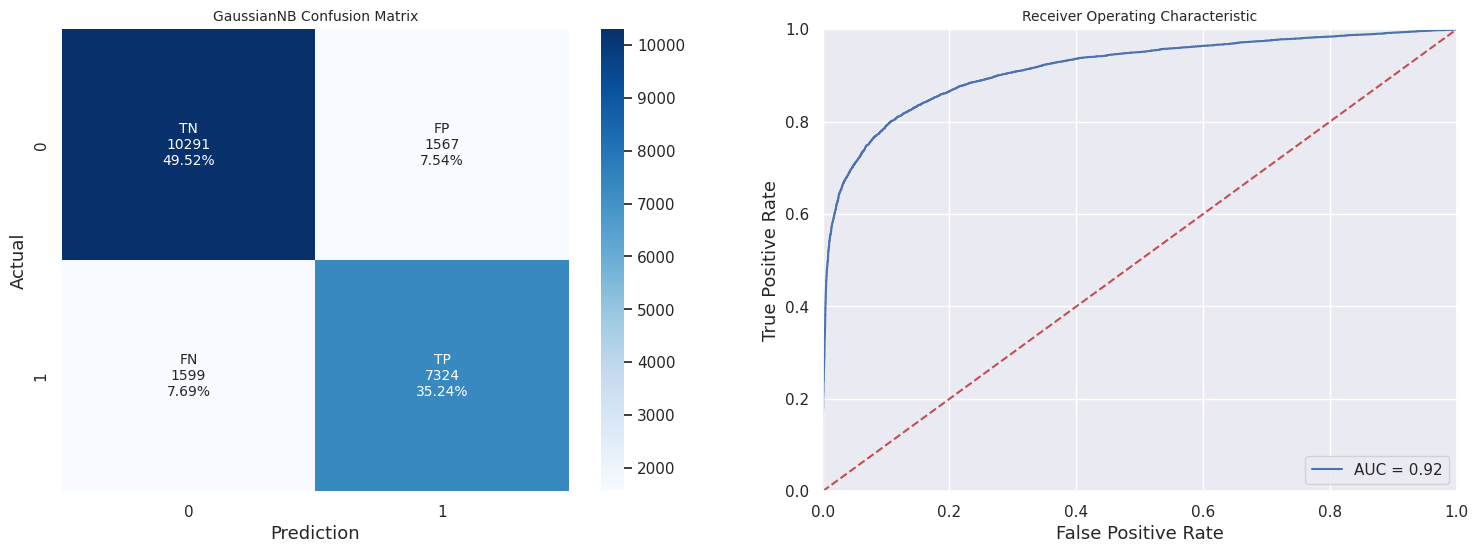

KNN : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.87      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.92     20781

ROC AUC Score : 96.60%



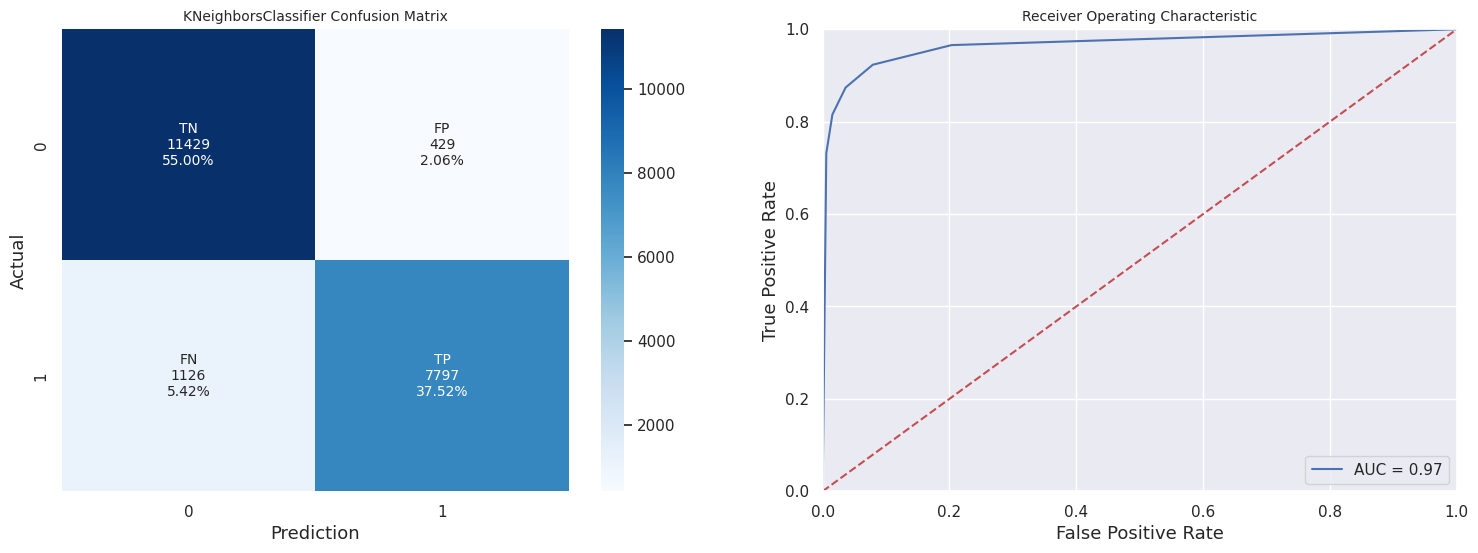

Stoch_GD : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

ROC AUC Score : 92.62%



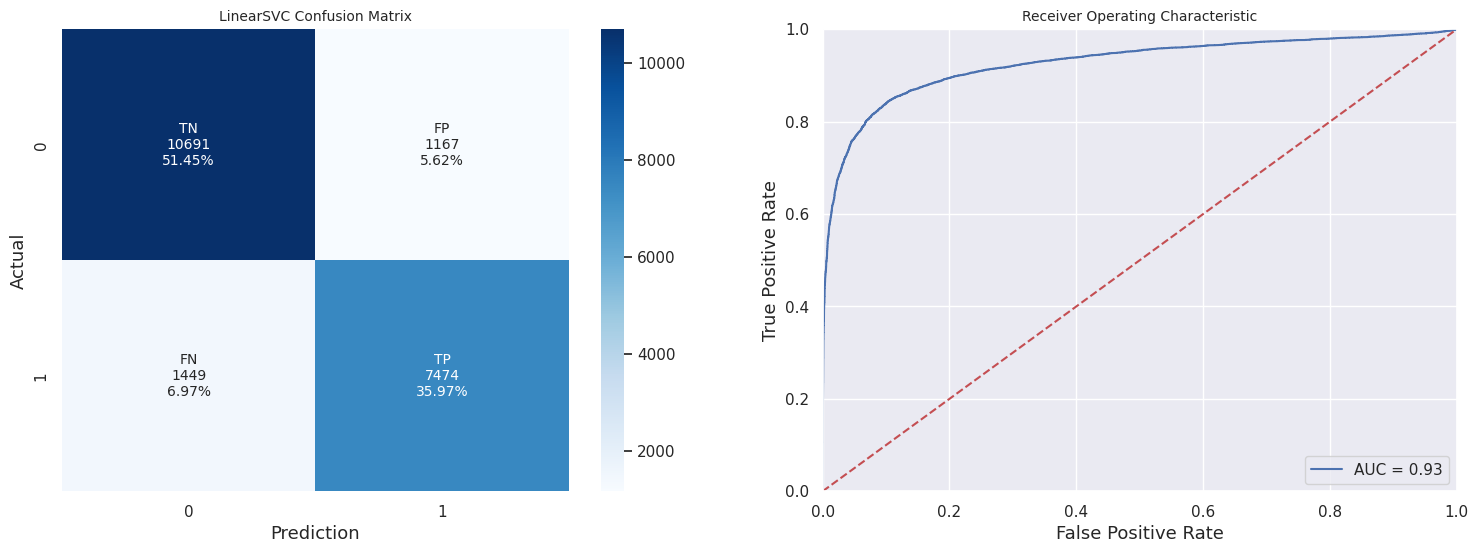

DT : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.77      0.83     35308
              satisfaction       0.75      0.90      0.82     27034

                  accuracy                           0.83     62342
                 macro avg       0.83      0.84      0.83     62342
              weighted avg       0.84      0.83      0.83     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.77      0.83     11858
              satisfaction       0.74      0.91      0.82      8923

                  accuracy                           0.83     20781
                 macro avg       0.83      0.84      0.83     20781
              weighted avg       0.84      0.83      0.83     20781

ROC AUC Score : 92.26%



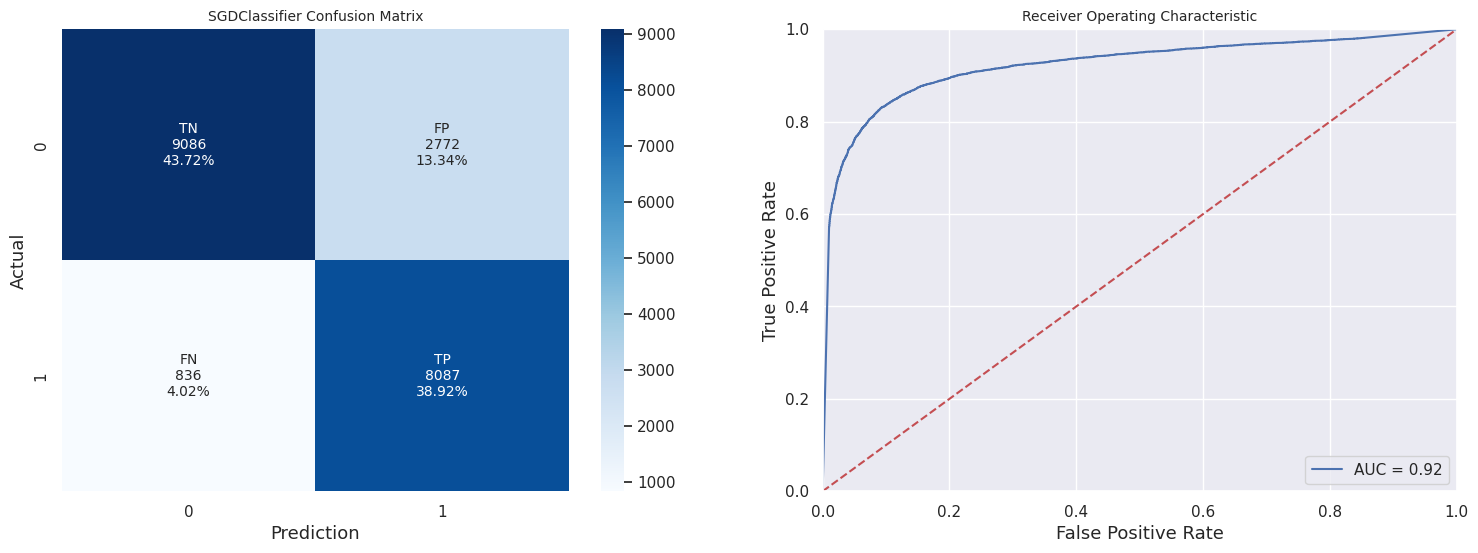

Ran_forest : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.94      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

ROC AUC Score : 94.72%



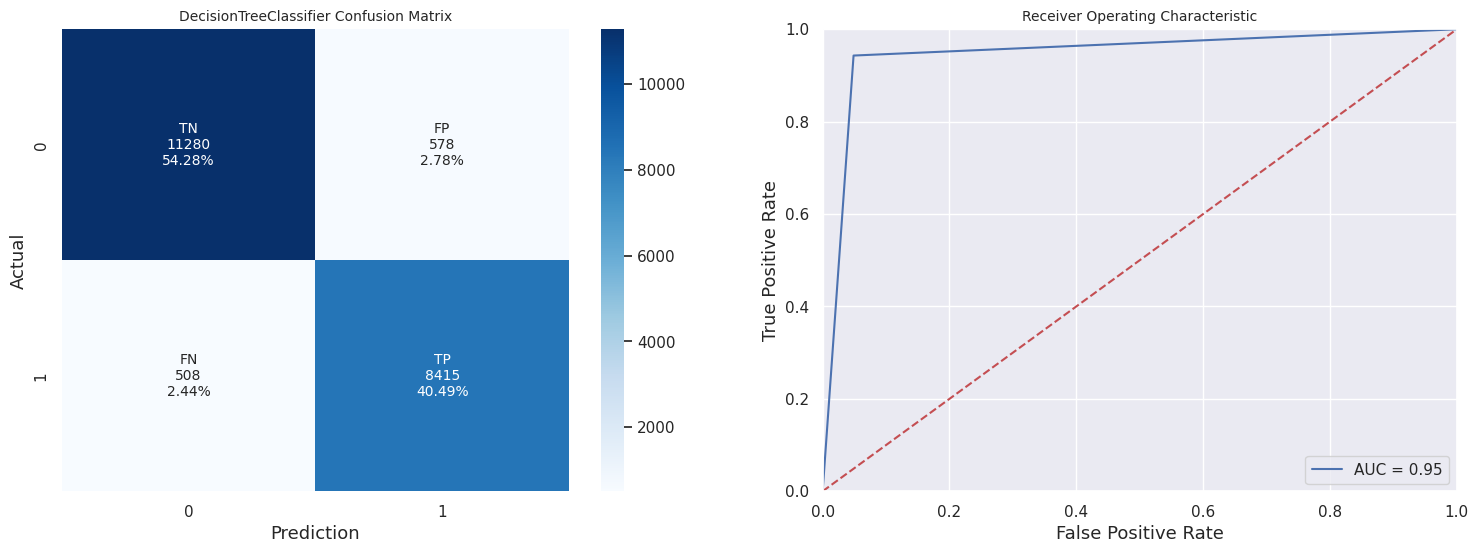

AdaBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

ROC AUC Score : 99.37%



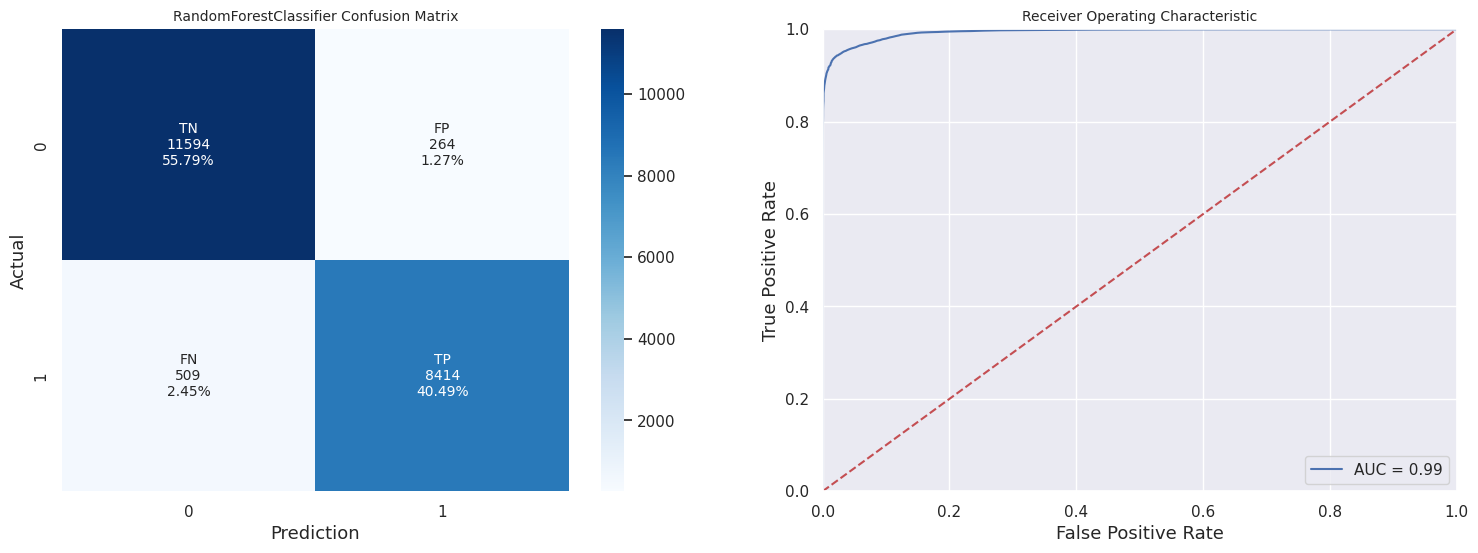

Grad_boost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.91      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

ROC AUC Score : 97.74%



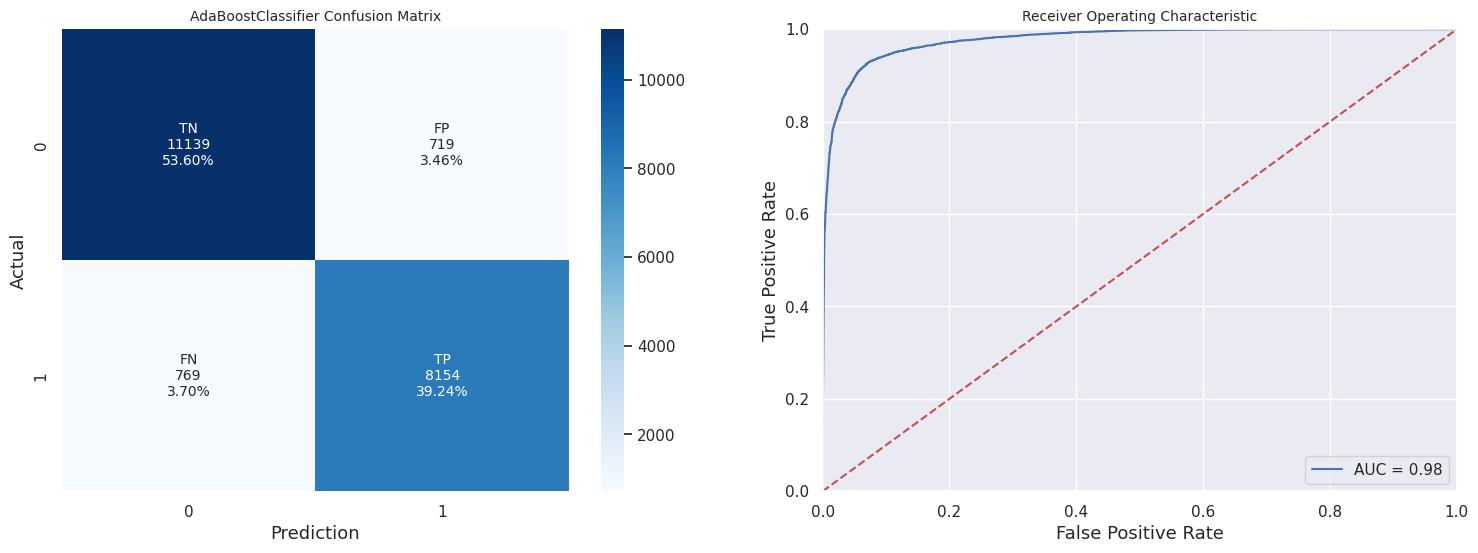

XGBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

ROC AUC Score : 98.71%



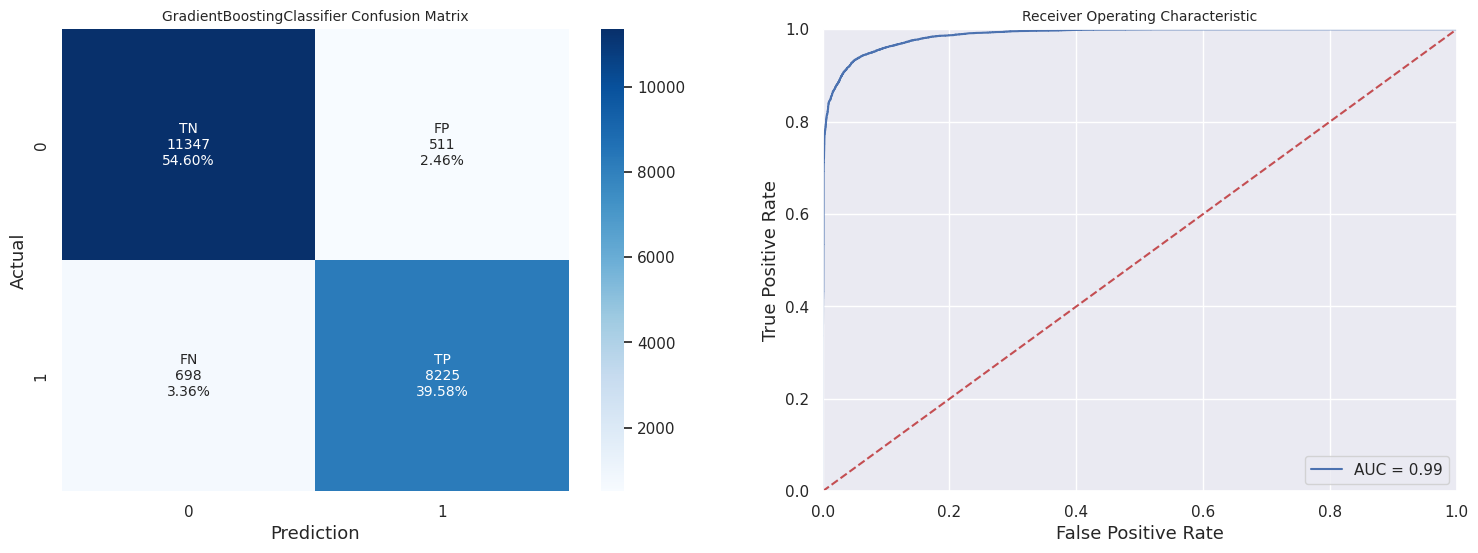

lightGbm : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     35308
              satisfaction       0.99      0.96      0.98     27034

                  accuracy                           0.98     62342
                 macro avg       0.98      0.98      0.98     62342
              weighted avg       0.98      0.98      0.98     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

ROC AUC Score : 99.50%



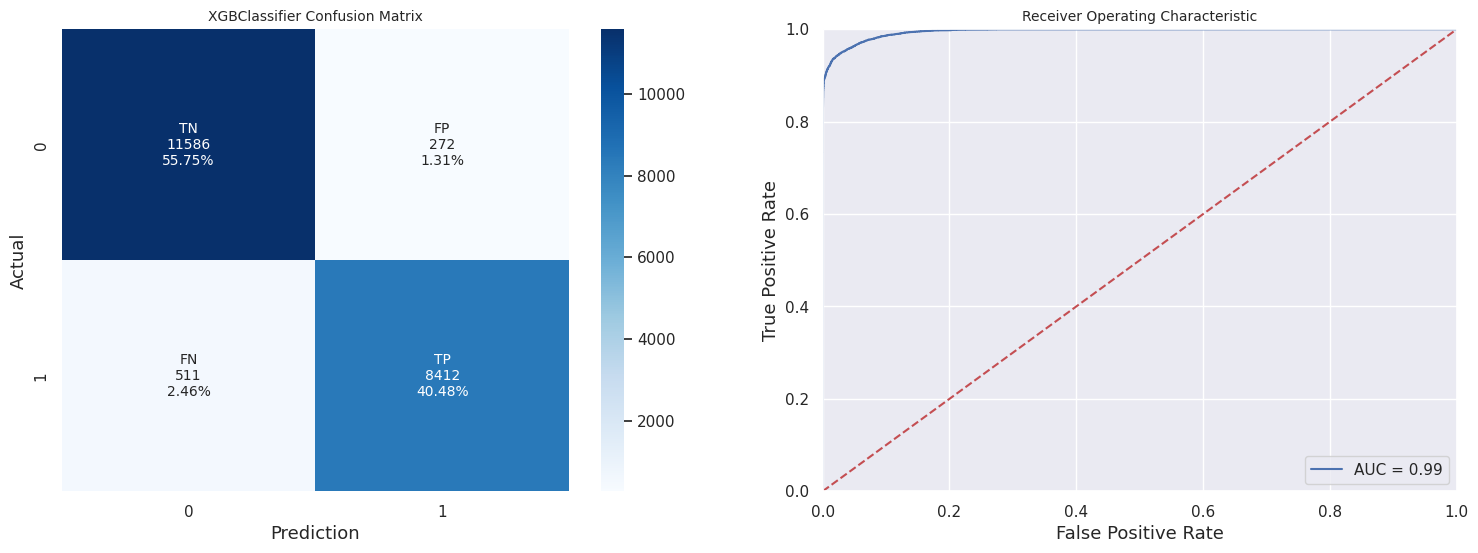

In [242]:
# putting all together at one place
logisreg_clf =LogisticRegression()
GNB_clf = GaussianNB()
LSVC_clf = LinearSVC()
KN_clf = KNeighborsClassifier()
SGD_clf= SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
DT_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf= AdaBoostClassifier()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
lgb_clf= lgb.LGBMClassifier()

clf_list = [logisreg_clf,GNB_clf,KN_clf,LSVC_clf,SGD_clf,DT_clf ,rf_clf,adb_clf,GB_clf,XGB_clf,lgb_clf]
clf_name_list = ['Log_reg','Gaus_NB','KNN','Stoch_GD','DT','Ran_forest','AdaBoost','Grad_boost','XGBoost','lightGbm']

for clf in clf_list:
    clf.fit(X_train,y_train)

train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):

    pred_train = clf.predict(X_train)
    pred_val = clf.predict(X_val)

    print(name,': \n')

    print('Training part:')
    print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print('Validation part:')
    print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))

    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_val, pred_val))

    make_classification_report(clf,X_val,y_val)

this representation gives clear idea of comparing differnt model in single-frame.


In [245]:
train_acc_list

[0.8743383272913926,
 0.8472458374771422,
 0.9447884251387507,
 0.8731032049019922,
 0.8271149465849668,
 1.0,
 0.9999839594494883,
 0.9286997529755221,
 0.942735234673254,
 0.9789387571781464]

In [247]:
test_acc_list

[0.8748375920311823,
 0.8476492950291131,
 0.9251720321447476,
 0.8741157788364371,
 0.8263798662239545,
 0.9477407247004476,
 0.9628025600307973,
 0.9283961310812762,
 0.9418218565035369,
 0.9623213512343005]

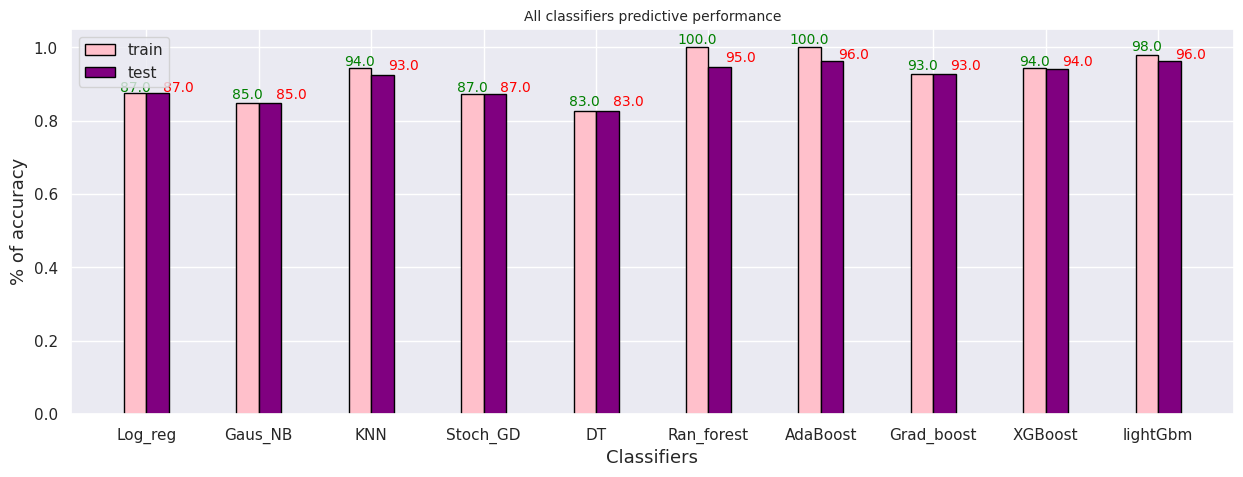

In [249]:
plt.figure(figsize=(15,5))

n = np.arange(10)
width = 0.2

plt.bar(n, train_acc_list, color = 'pink',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'green')

plt.bar(n + width, test_acc_list, color = 'purple',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")

plt.xticks(n + width/2,clf_name_list)
plt.legend()

plt.show()

Observation

Clearly from the above graph we can predict that Xgboost and grad_boost are performing best for our model, so we can use them to train our model.


# **Conclusion**

- The goal of the project was completed to figure out best model to find out The  Airline passenger satisfaction level:neutral or dissatisfaction', 'satisfaction'

- I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this.

- The model is performing very good with the test data too.